In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df_mental = pd.read_csv('mental.csv')
len(df_mental.index)

/var/folders/2g/r06hxxyx0tv4z9vkjcrvtdsw0000gn/T/ipykernel_1330/3192912858.py:1: DtypeWarning: Columns (0,6,7,9,26,37,40,59,67,68,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mental = pd.read_csv('mental.csv')


24452

In [13]:
missing_values = df_mental['Type_Code'].isnull().sum()
missing_values

0

In [16]:
unique_values_count = df_mental['Source_Name'].nunique()
unique_values_count

7748

In [17]:
# Loop through each column
for column in df_mental.columns:
    # Calculate the number of missing values in the column
    missing_values_count = df_mental[column].isnull().sum()
    
    # Calculate the number of unique values in the column
    unique_values_count = df_mental[column].nunique()
    
    # Print the results
    print(f"Column: {column}")
    print(f"   Number of missing values: {missing_values_count}")
    print(f"   Number of unique values: {unique_values_count}")
    print()


Column: Source_ID
   Number of missing values: 0
   Number of unique values: 8152

Column: Source_Name
   Number of missing values: 0
   Number of unique values: 7748

Column: Status_Code
   Number of missing values: 0
   Number of unique values: 3

Column: Status_Description
   Number of missing values: 0
   Number of unique values: 3

Column: Type_Code
   Number of missing values: 0
   Number of unique values: 13

Column: Type_Desc
   Number of missing values: 0
   Number of unique values: 11

Column: Address
   Number of missing values: 18976
   Number of unique values: 5192

Column: City
   Number of missing values: 18927
   Number of unique values: 2962

Column: State_Abbr
   Number of missing values: 0
   Number of unique values: 59

Column: Postal_Code
   Number of missing values: 18928
   Number of unique values: 5159

Column: Degree_of_Shortage
   Number of missing values: 5186
   Number of unique values: 28

Column: Designation_Date
   Number of missing values: 0
   Number of

In [14]:
# Get unique values in the 'Provider_Type' column
unique_provider_types = df_mental['Provider_Type'].unique()
unique_provider_types

array([nan, 'Psychiatrist', 'Core Mental Health',
       'Psychiatrist / Core Mental Health'], dtype=object)

In [15]:
# Replace 'Degree_of_Shortage' with the actual column name if it's different
count_degree_of_shortage = df_mental['Degree_of_Shortage'].isin([None, 'Not applicable']).sum()
count_degree_of_shortage


18673

In [16]:
# Count the number of rows where the values in the specified columns do not match
mismatch_count = (df_mental['US_Mexico_Border_County'] != df_mental['US_Mexico_Border_100km']).sum()

print(f"Number of rows where 'US_Mexico_Border_County' and 'US_Mexico_Border_100km' values do not match: {mismatch_count}")


Number of rows where 'US_Mexico_Border_County' and 'US_Mexico_Border_100km' values do not match: 366


In [17]:
# Create a boolean mask for mismatched rows
mismatch_mask = df_mental['US_Mexico_Border_County'] != df_mental['US_Mexico_Border_100km']

# Display only the 'US_Mexico_Border_County' and 'US_Mexico_Border_100km' columns for mismatched rows
mismatched_rows = df_mental.loc[mismatch_mask, ['US_Mexico_Border_County', 'US_Mexico_Border_100km']]

# Print the mismatched rows
#print("Rows where 'US_Mexico_Border_County' and 'US_Mexico_Border_100km' values do not match:")
mismatched_rows


,US_Mexico_Border_County,US_Mexico_Border_100km
1203,Y,N
1204,Y,N
1205,Y,N
1206,Y,N
1222,Y,N
...,...,...
16825,Y,N
16826,Y,N
16827,Y,N
16828,Y,N


degree of shortage - get rid of null values
designation_pop - get rid of null
estimated_underserved_pop and estimated served_pop - get rid of null values
total fte clinicians
HPSA_shortage

?
component source name?s

In [21]:
df2 = pd.read_csv('mental_copy.csv')
# Specify the columns for which you want to remove rows with null values
columns_to_check = ['Designation_Pop', 'Estimated_Underserved_Pop', 'Rural_Status_Desc',
                    'Estimated_Served_Pop', 'Total_FTE_Clinicians', 'HPSA_Shortage', 'Percent_Pop_Below_Poverty']

# Remove rows with null values under the specified columns
df_cleaned = df2.dropna(subset=columns_to_check)

# Replace 'Source_Name' with the actual column name if it's different
df_cleaned = df_cleaned.drop('Source_Name', axis=1)

# Print the cleaned DataFrame
df_cleaned


,Source_ID,Status_Description,Type_Desc,State_Abbr,Designation_Date,Designation_Last_Update_Date,Designation_Pop,Estimated_Underserved_Pop,Estimated_Served_Pop,Total_FTE_Clinicians,...,County_Name,StateCountyFIPS,Primary_HHS_Region_Name,US_Mexico_Border_County,HPSA_Name,HPSA_Component_Name,HPSA_Pop_Type_Code,HPSA_Pop_Type_Desc,Rural_Status_Desc,HPSA_Designation_Pop_Type_Desc
301,7279740631,Withdrawn,Geographic HPSA,MN,5/31/07,7/2/18,216184.0,-50216.0,266400.0,8.8800,...,Pope,27121,Region V,N,Mental Health Region 4,Pope,TRC,Geographic Population,Rural,Geographic Population
302,7279740631,Withdrawn,Geographic HPSA,MN,5/31/07,7/2/18,216184.0,-50216.0,266400.0,8.8800,...,Otter Tail,27111,Region V,N,Mental Health Region 4,Otter Tail,TRC,Geographic Population,Rural,Geographic Population
303,7279740631,Withdrawn,Geographic HPSA,MN,5/31/07,7/2/18,216184.0,-50216.0,266400.0,8.8800,...,Wilkin,27167,Region V,N,Mental Health Region 4,Wilkin,TRC,Geographic Population,Rural,Geographic Population
304,7279740631,Withdrawn,Geographic HPSA,MN,5/31/07,7/2/18,216184.0,-50216.0,266400.0,8.8800,...,Douglas,27041,Region V,N,Mental Health Region 4,Douglas,TRC,Geographic Population,Rural,Geographic Population
305,7279740631,Withdrawn,Geographic HPSA,MN,5/31/07,7/2/18,216184.0,-50216.0,266400.0,8.8800,...,Clay,27027,Region V,N,Mental Health Region 4,Clay,TRC,Geographic Population,Non-Rural,Geographic Population
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24447,7484874751,Proposed For Withdrawal,High Needs Geographic HPSA,TX,10/28/94,11/19/19,3099.0,3099.0,0.0,0.0000,...,Coke,48081,Region VI,N,Coke County,Coke,TRC,Geographic Population,Rural,Geographic Population
24448,7483512170,Proposed For Withdrawal,HPSA Population,TX,7/18/18,11/19/19,43131.0,40129.0,3002.0,0.1501,...,Tom Green,48451,Region VI,N,Low Income-Tom Green County,Tom Green,LI,Low Income Population HPSA,Partially Rural,Low Income Population HPSA
24449,7554036017,Proposed For Withdrawal,High Needs Geographic HPSA,WI,12/31/18,5/13/19,45152.0,3152.0,42000.0,2.1000,...,Rock,55105,Region V,N,Beloit,Turtle Town,TRC,Geographic Population,Non-Rural,Geographic Population
24450,7554036017,Proposed For Withdrawal,High Needs Geographic HPSA,WI,12/31/18,5/13/19,45152.0,3152.0,42000.0,2.1000,...,Rock,55105,Region V,N,Beloit,Beloit City,TRC,Geographic Population,Non-Rural,Geographic Population


In [63]:
states_to_exclude = ['AS', 'GU', 'MP', 'PR', 'TT', 'VI', 'MH', 'PW', 'FM']

# Filter out rows with specified states
df_cleaned = df_cleaned[~df_cleaned['State_Abbr'].isin(states_to_exclude)]

# Display the new DataFrame
print("New DataFrame (df_cleaned) after excluding specified states:")
print(df_cleaned)


New DataFrame (df_cleaned) after excluding specified states:
        Source_ID             Source_Name       Status_Description  \
301    7279740631  Mental Health Region 4                Withdrawn   
302    7279740631  Mental Health Region 4                Withdrawn   
303    7279740631  Mental Health Region 4                Withdrawn   
304    7279740631  Mental Health Region 4                Withdrawn   
305    7279740631  Mental Health Region 4                Withdrawn   
...           ...                     ...                      ...   
24447  7484874751             Coke County  Proposed For Withdrawal   
24448  7483512170     LI-Tom Green County  Proposed For Withdrawal   
24449  7554036017                  Beloit  Proposed For Withdrawal   
24450  7554036017                  Beloit  Proposed For Withdrawal   
24451  7554036017                  Beloit  Proposed For Withdrawal   

                        Type_Desc State_Abbr Degree_of_Shortage  \
301               Geographic HP

In [30]:
# Loop through each column
for column in df_cleaned.columns:
    # Calculate the number of missing values in the column
    missing_values_count = df_cleaned[column].isnull().sum()
    
    # Calculate the number of unique values in the column
    unique_values_count = df_cleaned[column].nunique()
    
    # Print the results
    print(f"Column: {column}")
    print(f"   Number of missing values: {missing_values_count}")
    print(f"   Number of unique values: {unique_values_count}")
    print()


Column: Source_ID
   Number of missing values: 0
   Number of unique values: 1714

Column: Source_Name
   Number of missing values: 0
   Number of unique values: 1564

Column: Status_Description
   Number of missing values: 0
   Number of unique values: 3

Column: Type_Desc
   Number of missing values: 0
   Number of unique values: 3

Column: State_Abbr
   Number of missing values: 0
   Number of unique values: 57

Column: Degree_of_Shortage
   Number of missing values: 0
   Number of unique values: 1

Column: Designation_Date
   Number of missing values: 0
   Number of unique values: 738

Column: Designation_Last_Update_Date
   Number of missing values: 0
   Number of unique values: 167

Column: Designation_Pop
   Number of missing values: 0
   Number of unique values: 1696

Column: Estimated_Underserved_Pop
   Number of missing values: 0
   Number of unique values: 1686

Column: Estimated_Served_Pop
   Number of missing values: 0
   Number of unique values: 509

Column: Total_FTE_Cli

In [22]:
df_cleaned

,Source_ID,Status_Description,Type_Desc,State_Abbr,Designation_Date,Designation_Last_Update_Date,Designation_Pop,Estimated_Underserved_Pop,Estimated_Served_Pop,Total_FTE_Clinicians,...,County_Name,StateCountyFIPS,Primary_HHS_Region_Name,US_Mexico_Border_County,HPSA_Name,HPSA_Component_Name,HPSA_Pop_Type_Code,HPSA_Pop_Type_Desc,Rural_Status_Desc,HPSA_Designation_Pop_Type_Desc
301,7279740631,Withdrawn,Geographic HPSA,MN,5/31/07,7/2/18,216184.0,-50216.0,266400.0,8.8800,...,Pope,27121,Region V,N,Mental Health Region 4,Pope,TRC,Geographic Population,Rural,Geographic Population
302,7279740631,Withdrawn,Geographic HPSA,MN,5/31/07,7/2/18,216184.0,-50216.0,266400.0,8.8800,...,Otter Tail,27111,Region V,N,Mental Health Region 4,Otter Tail,TRC,Geographic Population,Rural,Geographic Population
303,7279740631,Withdrawn,Geographic HPSA,MN,5/31/07,7/2/18,216184.0,-50216.0,266400.0,8.8800,...,Wilkin,27167,Region V,N,Mental Health Region 4,Wilkin,TRC,Geographic Population,Rural,Geographic Population
304,7279740631,Withdrawn,Geographic HPSA,MN,5/31/07,7/2/18,216184.0,-50216.0,266400.0,8.8800,...,Douglas,27041,Region V,N,Mental Health Region 4,Douglas,TRC,Geographic Population,Rural,Geographic Population
305,7279740631,Withdrawn,Geographic HPSA,MN,5/31/07,7/2/18,216184.0,-50216.0,266400.0,8.8800,...,Clay,27027,Region V,N,Mental Health Region 4,Clay,TRC,Geographic Population,Non-Rural,Geographic Population
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24447,7484874751,Proposed For Withdrawal,High Needs Geographic HPSA,TX,10/28/94,11/19/19,3099.0,3099.0,0.0,0.0000,...,Coke,48081,Region VI,N,Coke County,Coke,TRC,Geographic Population,Rural,Geographic Population
24448,7483512170,Proposed For Withdrawal,HPSA Population,TX,7/18/18,11/19/19,43131.0,40129.0,3002.0,0.1501,...,Tom Green,48451,Region VI,N,Low Income-Tom Green County,Tom Green,LI,Low Income Population HPSA,Partially Rural,Low Income Population HPSA
24449,7554036017,Proposed For Withdrawal,High Needs Geographic HPSA,WI,12/31/18,5/13/19,45152.0,3152.0,42000.0,2.1000,...,Rock,55105,Region V,N,Beloit,Turtle Town,TRC,Geographic Population,Non-Rural,Geographic Population
24450,7554036017,Proposed For Withdrawal,High Needs Geographic HPSA,WI,12/31/18,5/13/19,45152.0,3152.0,42000.0,2.1000,...,Rock,55105,Region V,N,Beloit,Beloit City,TRC,Geographic Population,Non-Rural,Geographic Population


In [57]:
# Assuming 'df_cleaned' is your cleaned DataFrame
# Replace 'State_Abbr' with the actual column name if it's different
state_abbr_counts = df_cleaned['State_Abbr'].value_counts()

# Display state abbreviations and their counts
print("State Abbreviation Counts:")
print(state_abbr_counts)

State Abbreviation Counts:
NY    2305
CA    1546
IL     996
FL     956
AZ     797
NV     650
MI     510
TX     499
WA     435
MD     350
MO     310
TN     267
NC     263
ME     244
GA     230
WI     178
OK     151
IN     150
AR     115
KY     110
SD     106
KS     101
IA      99
MS      97
VA      94
CO      89
NE      88
UT      88
MN      86
NH      82
PA      75
LA      71
SC      69
OH      69
AL      66
NM      65
ND      65
CT      64
WV      60
MT      58
OR      48
ID      48
DC      44
MH      32
HI      25
AK      24
WY      23
PW      16
MA       8
FM       4
RI       3
DE       1
Name: State_Abbr, dtype: int64


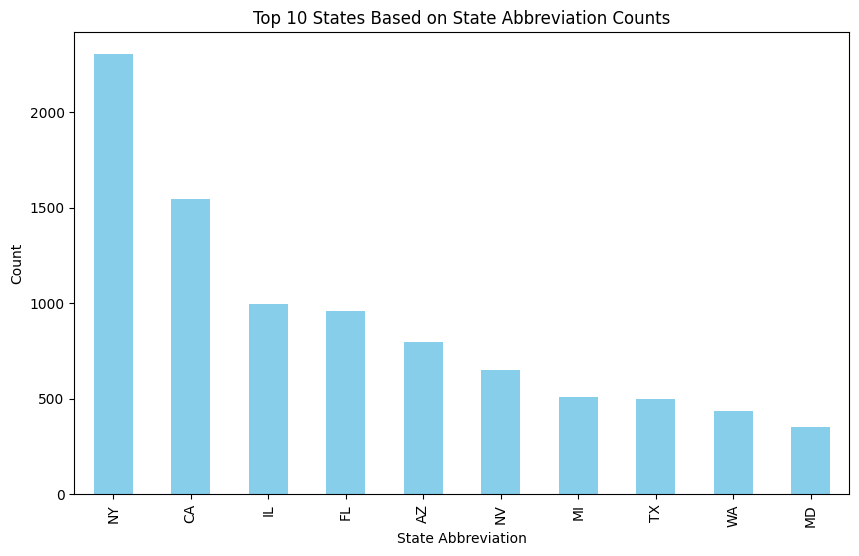

In [38]:
# Get the top 10 states
top_10_states = state_abbr_counts.head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_states.plot(kind='bar', color='skyblue')
plt.title('Top 10 States Based on State Abbreviation Counts')
plt.xlabel('State Abbreviation')
plt.ylabel('Count')
plt.show()

In [39]:
regions = df_cleaned['Primary_HHS_Region_Name'].value_counts()
regions

Region IX      3081
Region II      2365
Region IV      2058
Region V       1989
Region VI       901
Region III      624
Region VII      598
Region X        555
Region VIII     429
Region I        401
Name: Primary_HHS_Region_Name, dtype: int64

In [41]:
rural_status_count = df_cleaned['Rural_Status_Desc'].value_counts()
rural_status_count

Non-Rural          9296
Rural              3198
Partially Rural     497
Not Applicable        6
Unknown               4
Name: Rural_Status_Desc, dtype: int64

In [43]:
df_cleaned.columns

Index(['Source_ID', 'Source_Name', 'Status_Description', 'Type_Desc',
       'State_Abbr', 'Degree_of_Shortage', 'Designation_Date',
       'Designation_Last_Update_Date', 'Designation_Pop',
       'Estimated_Underserved_Pop', 'Estimated_Served_Pop',
       'Total_FTE_Clinicians', 'Metropolitan_Indicator_Desc',
       'Percent_Pop_Below_Poverty', 'HPSA_Score', 'HPSA_Shortage',
       'Component_Source_Name', 'Component_Status_Desc', 'Component_Type_Desc',
       'County_Name', 'StateCountyFIPS', 'Primary_HHS_Region_Name',
       'US_Mexico_Border_County', 'HPSA_Name', 'HPSA_Component_Name',
       'HPSA_Pop_Type_Code', 'HPSA_Pop_Type_Desc', 'Rural_Status_Desc',
       'HPSA_Designation_Pop_Type_Desc'],
      dtype='object')

In [44]:
# Assuming 'df_cleaned' is your cleaned DataFrame
# Replace 'HPSA_Score' with the actual column name if it's different
average_hpsa_score = df_cleaned['HPSA_Score'].mean()
average_hpsa_score

15.574417352511345

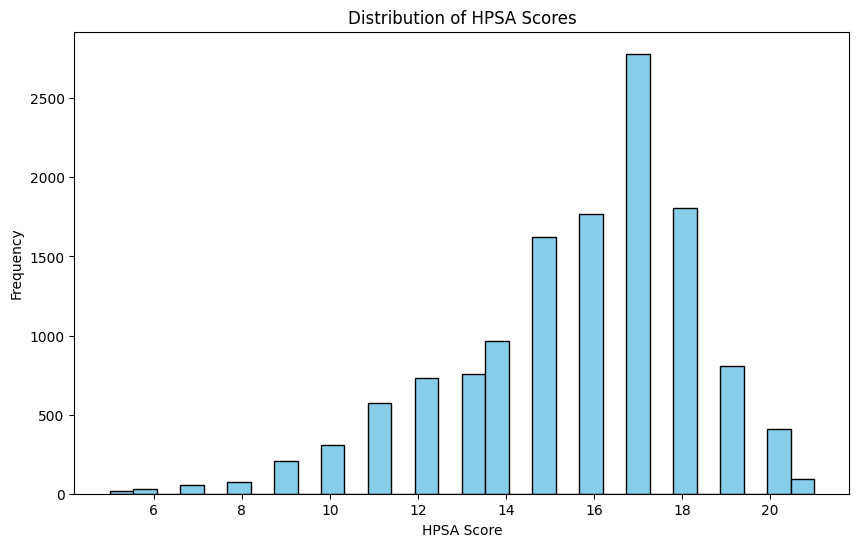

In [45]:
hpsa_scores = df_cleaned['HPSA_Score']

# plot
plt.figure(figsize=(10, 6))
plt.hist(hpsa_scores, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of HPSA Scores')
plt.xlabel('HPSA Score')
plt.ylabel('Frequency')
plt.show()


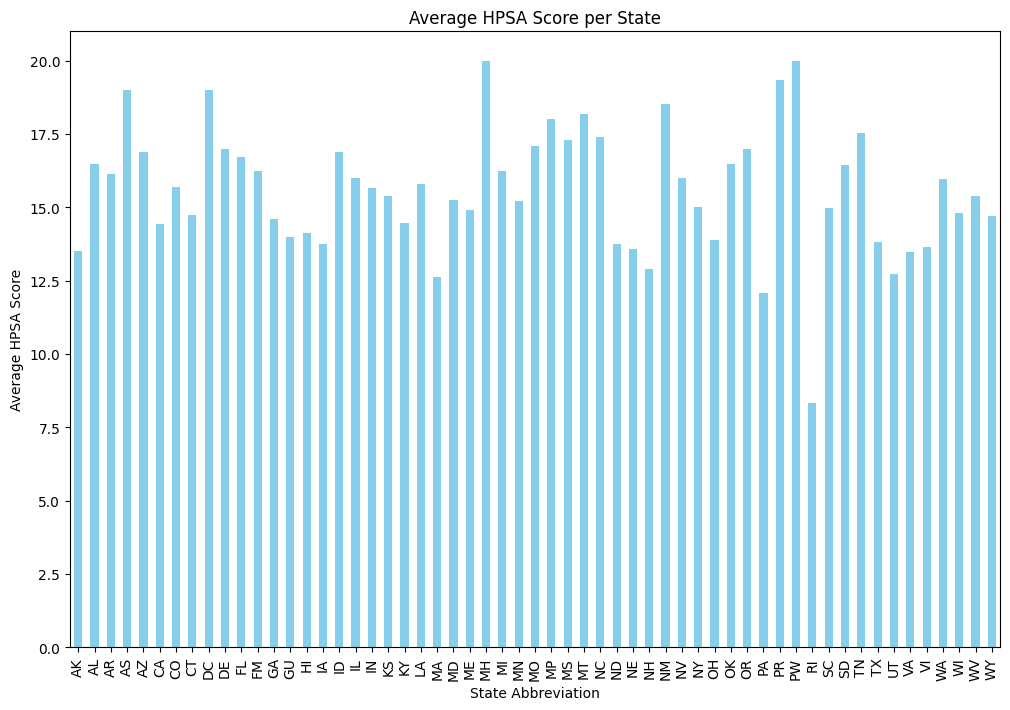

In [51]:

# Assuming 'df_cleaned' is your cleaned DataFrame
# Replace 'HPSA_Score' and 'State_Abbr' with the actual column names if they're different
average_hpsa_by_state = df_cleaned.groupby('State_Abbr')['HPSA_Score'].mean()

# Plotting
plt.figure(figsize=(12, 8))
average_hpsa_by_state.plot(kind='bar', color='skyblue')
plt.title('Average HPSA Score per State')
plt.xlabel('State Abbreviation')
plt.ylabel('Average HPSA Score')
plt.show()


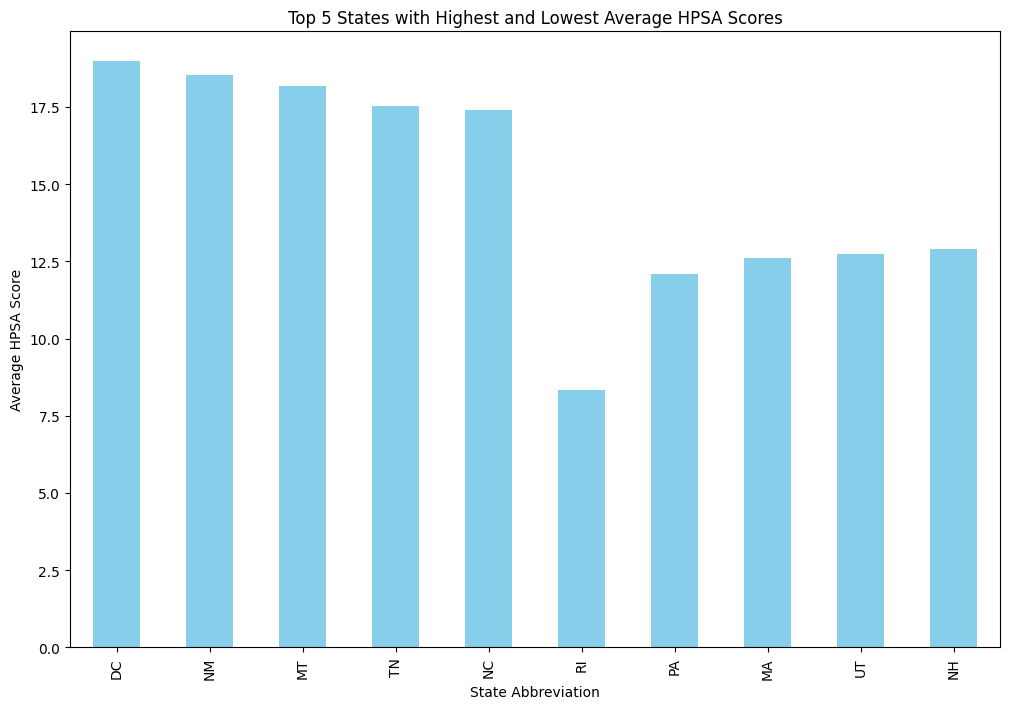

In [60]:

# Assuming 'df_cleaned' is your cleaned DataFrame
# Replace 'HPSA_Score' and 'State_Abbr' with the actual column names if they're different
average_hpsa_by_state = df_cleaned.groupby('State_Abbr')['HPSA_Score'].mean()

# Find the top 5 states with the highest and lowest average scores
top_5_highest = average_hpsa_by_state.nlargest(5)
top_5_lowest = average_hpsa_by_state.nsmallest(5)

# Combine the two sets of states
top_5_states = pd.concat([top_5_highest, top_5_lowest])

# Plotting
plt.figure(figsize=(12, 8))
top_5_states.plot(kind='bar', color='skyblue')
plt.title('Top 5 States with Highest and Lowest Average HPSA Scores')
plt.xlabel('State Abbreviation')
plt.ylabel('Average HPSA Score')
plt.show()


In [46]:
average_hpsa_shortage = df_cleaned['HPSA_Shortage'].mean()
average_hpsa_shortage

8.31662078301669

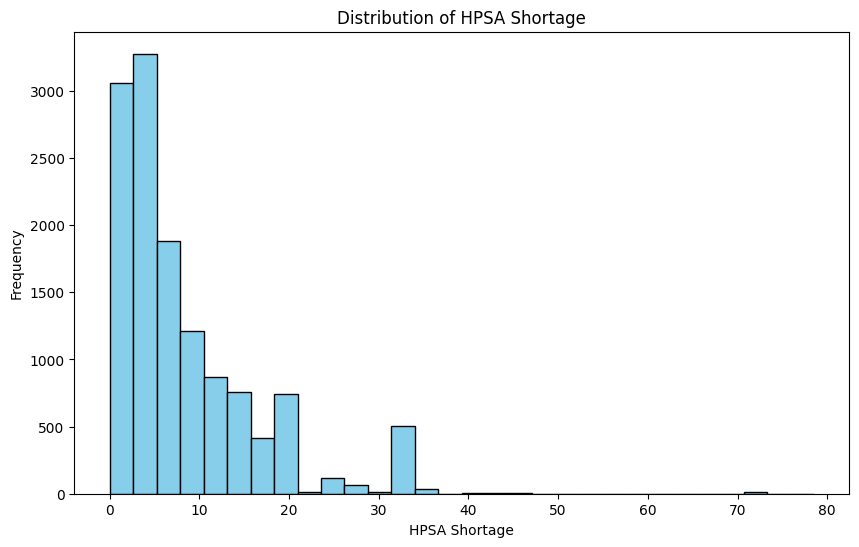

In [48]:
hpsa_shortage = df_cleaned['HPSA_Shortage']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(hpsa_shortage, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of HPSA Shortage')
plt.xlabel('HPSA Shortage')
plt.ylabel('Frequency')
plt.show()

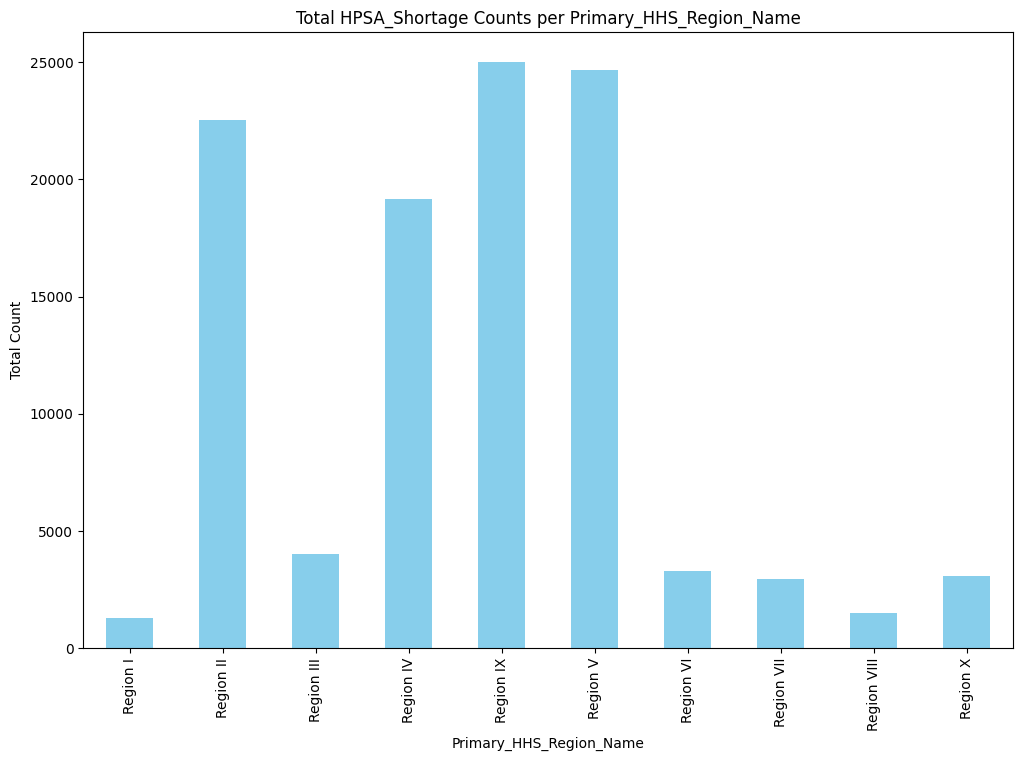

In [61]:
# Assuming 'df_cleaned' is your cleaned DataFrame
# Replace 'HPSA_Shortage' and 'Primary_HHS_Region_Name' with the actual column names if they're different
hpsa_region_sum = df_cleaned.groupby('Primary_HHS_Region_Name')['HPSA_Shortage'].sum()

# Plotting
hpsa_region_sum.plot(kind='bar', figsize=(12, 8), color='skyblue')
plt.title('Total HPSA_Shortage Counts per Primary_HHS_Region_Name')
plt.xlabel('Primary_HHS_Region_Name')
plt.ylabel('Total Count')
plt.show()


In [53]:
avg_poverty = df_cleaned['Percent_Pop_Below_Poverty'].mean()
avg_poverty

22.21880624567341

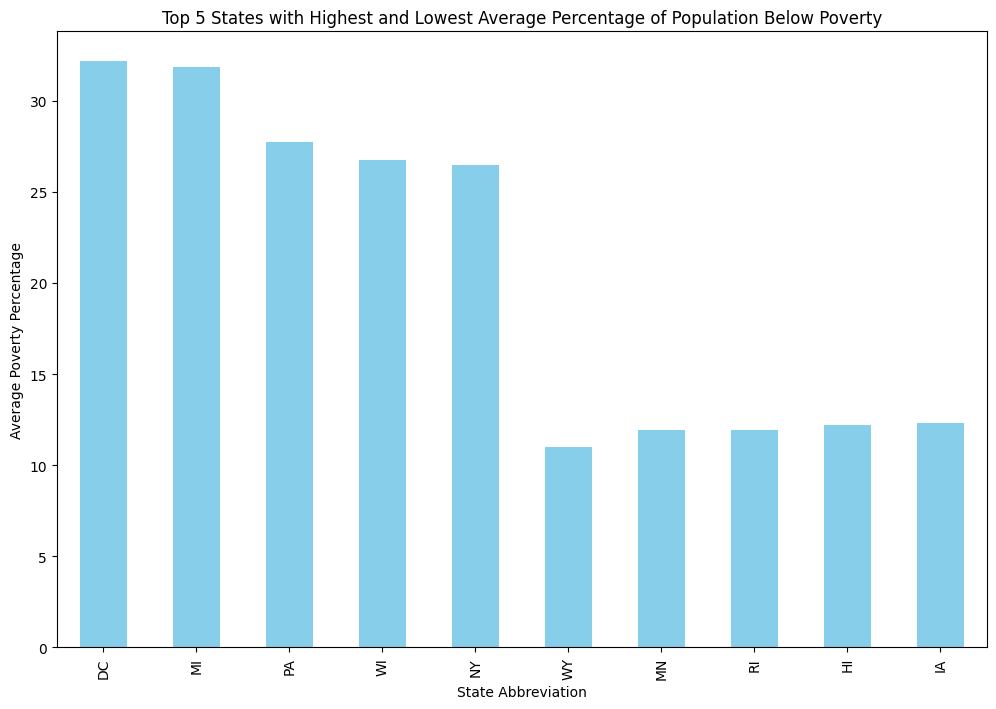

In [64]:
# Assuming 'df_cleaned' is your cleaned DataFrame
# Replace 'HPSA_Score' and 'State_Abbr' with the actual column names if they're different
avg_poverty_by_state = df_cleaned.groupby('State_Abbr')['Percent_Pop_Below_Poverty'].mean()

# Find the top 5 states with the highest and lowest average scores
top_5_poverty = avg_poverty_by_state.nlargest(5)
lowest_5_poverty = avg_poverty_by_state.nsmallest(5)

# Combine the two sets of states
poverty_states = pd.concat([top_5_poverty, lowest_5_poverty])

# Plotting
plt.figure(figsize=(12, 8))
poverty_states.plot(kind='bar', color='skyblue')
plt.title('Top 5 States with Highest and Lowest Average Percentage of Population Below Poverty')
plt.xlabel('State Abbreviation')
plt.ylabel('Average Poverty Percentage')
plt.show()


# Primary

In [2]:
df_primary = pd.read_csv('primary.csv')
len(df_primary.index)

/var/folders/2g/r06hxxyx0tv4z9vkjcrvtdsw0000gn/T/ipykernel_45384/438247923.py:1: DtypeWarning: Columns (6,7,9,26,37,40,59,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df_primary = pd.read_csv('primary.csv')


56716

In [3]:


# Loop through each column
for column in df_primary.columns:
    # Calculate the number of missing values in the column
    missing_values_count = df_primary[column].isnull().sum()
    
    # Calculate the number of unique values in the column
    unique_values_count = df_primary[column].nunique()
    
    # Print the results
    print(f"Column: {column}")
    print(f"   Number of missing values: {missing_values_count}")
    print(f"   Number of unique values: {unique_values_count}")
    print()


Column: Source_ID
   Number of missing values: 0
   Number of unique values: 13459

Column: Source_Name
   Number of missing values: 0
   Number of unique values: 12413

Column: Status_Code
   Number of missing values: 0
   Number of unique values: 3

Column: Status_Description
   Number of missing values: 0
   Number of unique values: 3

Column: Type_Code
   Number of missing values: 0
   Number of unique values: 12

Column: Type_Desc
   Number of missing values: 0
   Number of unique values: 10

Column: Address
   Number of missing values: 51124
   Number of unique values: 5259

Column: City
   Number of missing values: 51074
   Number of unique values: 2984

Column: State_Abbr
   Number of missing values: 0
   Number of unique values: 59

Column: Postal_Code
   Number of missing values: 51076
   Number of unique values: 5236

Column: Degree_of_Shortage
   Number of missing values: 5393
   Number of unique values: 35

Column: Designation_Date
   Number of missing values: 0
   Number 

In [4]:
# List of columns to keep
keep_columns = ['Source_ID', 'Status_Description', 'Type_Desc',
                   'State_Abbr', 'Degree_of_Shortage', 'Designation_Date',
                   'Designation_Last_Update_Date', 'Designation_Pop',
                   'Estimated_Underserved_Pop', 'Estimated_Served_Pop',
                   'Total_FTE_Clinicians', 'Metropolitan_Indicator_Desc',
                   'Percent_Pop_Below_Poverty', 'HPSA_Score', 'HPSA_Shortage',
                   'Component_Source_Name', 'Component_Status_Desc', 'Component_Type_Desc',
                   'County_Name', 'StateCountyFIPS', 'Primary_HHS_Region_Name',
                   'US_Mexico_Border_County', 'HPSA_Name', 'HPSA_Component_Name',
                   'HPSA_Pop_Type_Code', 'HPSA_Pop_Type_Desc', 'Rural_Status_Desc',
                   'HPSA_Designation_Pop_Type_Desc']

# Update DataFrame to include only the specified columns
df_primary = df_primary[keep_columns]

df_primary


,Source_ID,Status_Description,Type_Desc,State_Abbr,Degree_of_Shortage,Designation_Date,Designation_Last_Update_Date,Designation_Pop,Estimated_Underserved_Pop,Estimated_Served_Pop,...,County_Name,StateCountyFIPS,Primary_HHS_Region_Name,US_Mexico_Border_County,HPSA_Name,HPSA_Component_Name,HPSA_Pop_Type_Code,HPSA_Pop_Type_Desc,Rural_Status_Desc,HPSA_Designation_Pop_Type_Desc
0,1569995651,Designated,"Indian, Tribal and Urban Indian Organizations",WY,NaN,2006-03-01,2011-07-27,NaN,NaN,NaN,...,Fremont,56013,Region VIII,N,Ft. Washakie PHS Indian Health Center,Ft. Washakie PHS Indian Health Center,NaN,NaN,Rural,"Indian, Tribal and Urban Indian Organizations"
1,1469994698,Designated,"Indian, Tribal and Urban Indian Organizations",SD,NaN,2009-08-01,2011-06-27,NaN,NaN,NaN,...,Corson,46031,Region VIII,N,McLaughlin PHS Indian Medical/Dental Clinic,McLaughlin PHS Indian Medical/Dental Clinic,NaN,NaN,Rural,"Indian, Tribal and Urban Indian Organizations"
2,1469994687,Designated,"Indian, Tribal and Urban Indian Organizations",SD,NaN,2002-10-26,2002-10-26,NaN,NaN,NaN,...,Charles Mix,46023,Region VIII,N,Wagner PHS Indian Hospital,Wagner PHS Indian Hospital,NaN,NaN,Rural,"Indian, Tribal and Urban Indian Organizations"
3,141999413V,Designated,"Indian, Tribal and Urban Indian Organizations",OR,NaN,2007-12-01,2007-12-01,NaN,NaN,NaN,...,Multnomah,41051,Region X,N,Portland Area Office,Portland Area Office,NaN,NaN,Non-Rural,"Indian, Tribal and Urban Indian Organizations"
4,14099940N2,Designated,"Indian, Tribal and Urban Indian Organizations",OK,NaN,2002-10-26,2011-08-02,1.0,NaN,NaN,...,Pottawatomie,40125,Region VI,N,Shawnee Health Center,Shawnee Health Center,NaN,NaN,Rural,"Indian, Tribal and Urban Indian Organizations"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56711,1566948303,Designated,Geographic HPSA,WY,Not applicable,1988-06-28,2017-10-28,1532.0,1532.0,0.0,...,Fremont,56013,Region VIII,N,Dubois,Dubois CCD,TRC,Geographic Population,Rural,Geographic Population
56712,1565158613,Designated,Geographic HPSA,WY,Not applicable,1992-11-30,2017-10-28,858.0,858.0,0.0,...,Johnson,56019,Region VIII,N,Kaycee Service Area,Kaycee CCD,TRC,Geographic Population,Rural,Geographic Population
56713,1563118211,Designated,Geographic HPSA,WY,Not applicable,1995-05-01,2017-10-28,3357.0,3357.0,0.0,...,Laramie,56021,Region VIII,N,Pine Bluffs,Pine Bluffs CCD,TRC,Geographic Population,Rural,Geographic Population
56714,1562598744,Designated,Geographic HPSA,WY,Not applicable,1984-03-14,2017-10-28,5361.0,1301.0,4060.0,...,Lincoln,56023,Region VIII,N,Kemmerer (East and West),Kemmerer East CCD,TRC,Geographic Population,Rural,Geographic Population


In [5]:

states_to_exclude = ['AS', 'GU', 'MP', 'PR', 'TT', 'VI', 'MH', 'PW', 'FM']

# Filter out rows with specified states
df_primary = df_primary[~df_primary['State_Abbr'].isin(states_to_exclude)]
df_primary

,Source_ID,Status_Description,Type_Desc,State_Abbr,Degree_of_Shortage,Designation_Date,Designation_Last_Update_Date,Designation_Pop,Estimated_Underserved_Pop,Estimated_Served_Pop,...,County_Name,StateCountyFIPS,Primary_HHS_Region_Name,US_Mexico_Border_County,HPSA_Name,HPSA_Component_Name,HPSA_Pop_Type_Code,HPSA_Pop_Type_Desc,Rural_Status_Desc,HPSA_Designation_Pop_Type_Desc
0,1569995651,Designated,"Indian, Tribal and Urban Indian Organizations",WY,NaN,2006-03-01,2011-07-27,NaN,NaN,NaN,...,Fremont,56013,Region VIII,N,Ft. Washakie PHS Indian Health Center,Ft. Washakie PHS Indian Health Center,NaN,NaN,Rural,"Indian, Tribal and Urban Indian Organizations"
1,1469994698,Designated,"Indian, Tribal and Urban Indian Organizations",SD,NaN,2009-08-01,2011-06-27,NaN,NaN,NaN,...,Corson,46031,Region VIII,N,McLaughlin PHS Indian Medical/Dental Clinic,McLaughlin PHS Indian Medical/Dental Clinic,NaN,NaN,Rural,"Indian, Tribal and Urban Indian Organizations"
2,1469994687,Designated,"Indian, Tribal and Urban Indian Organizations",SD,NaN,2002-10-26,2002-10-26,NaN,NaN,NaN,...,Charles Mix,46023,Region VIII,N,Wagner PHS Indian Hospital,Wagner PHS Indian Hospital,NaN,NaN,Rural,"Indian, Tribal and Urban Indian Organizations"
3,141999413V,Designated,"Indian, Tribal and Urban Indian Organizations",OR,NaN,2007-12-01,2007-12-01,NaN,NaN,NaN,...,Multnomah,41051,Region X,N,Portland Area Office,Portland Area Office,NaN,NaN,Non-Rural,"Indian, Tribal and Urban Indian Organizations"
4,14099940N2,Designated,"Indian, Tribal and Urban Indian Organizations",OK,NaN,2002-10-26,2011-08-02,1.0,NaN,NaN,...,Pottawatomie,40125,Region VI,N,Shawnee Health Center,Shawnee Health Center,NaN,NaN,Rural,"Indian, Tribal and Urban Indian Organizations"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56711,1566948303,Designated,Geographic HPSA,WY,Not applicable,1988-06-28,2017-10-28,1532.0,1532.0,0.0,...,Fremont,56013,Region VIII,N,Dubois,Dubois CCD,TRC,Geographic Population,Rural,Geographic Population
56712,1565158613,Designated,Geographic HPSA,WY,Not applicable,1992-11-30,2017-10-28,858.0,858.0,0.0,...,Johnson,56019,Region VIII,N,Kaycee Service Area,Kaycee CCD,TRC,Geographic Population,Rural,Geographic Population
56713,1563118211,Designated,Geographic HPSA,WY,Not applicable,1995-05-01,2017-10-28,3357.0,3357.0,0.0,...,Laramie,56021,Region VIII,N,Pine Bluffs,Pine Bluffs CCD,TRC,Geographic Population,Rural,Geographic Population
56714,1562598744,Designated,Geographic HPSA,WY,Not applicable,1984-03-14,2017-10-28,5361.0,1301.0,4060.0,...,Lincoln,56023,Region VIII,N,Kemmerer (East and West),Kemmerer East CCD,TRC,Geographic Population,Rural,Geographic Population


In [6]:
# remove missing rows
# Replace the column names if they are different in your dataset
columns_to_check = ['Degree_of_Shortage', 'Designation_Pop', 'Estimated_Underserved_Pop',
                    'Estimated_Served_Pop', 'Total_FTE_Clinicians', 'Percent_Pop_Below_Poverty',
                    'HPSA_Shortage', 'HPSA_Pop_Type_Code', 'HPSA_Pop_Type_Desc', 'Rural_Status_Desc']

# Drop rows with missing values in the specified columns
df_primary = df_primary.dropna(subset=columns_to_check)

df_primary

,Source_ID,Status_Description,Type_Desc,State_Abbr,Degree_of_Shortage,Designation_Date,Designation_Last_Update_Date,Designation_Pop,Estimated_Underserved_Pop,Estimated_Served_Pop,...,County_Name,StateCountyFIPS,Primary_HHS_Region_Name,US_Mexico_Border_County,HPSA_Name,HPSA_Component_Name,HPSA_Pop_Type_Code,HPSA_Pop_Type_Desc,Rural_Status_Desc,HPSA_Designation_Pop_Type_Desc
6007,1029990222,Withdrawn,Geographic HPSA,AK,Not applicable,1993-11-12,2018-07-02,9120.0,7720.0,1400.0,...,Matanuska-Susitna,2170,Region X,N,Talkeetna/Trapper Creek,1.01,TRC,Geographic Population,Rural,Geographic Population
6008,1029990222,Withdrawn,Geographic HPSA,AK,Not applicable,1993-11-12,2018-07-02,9120.0,7720.0,1400.0,...,Matanuska-Susitna,2170,Region X,N,Talkeetna/Trapper Creek,1.02,TRC,Geographic Population,Rural,Geographic Population
6009,1029990222,Withdrawn,Geographic HPSA,AK,Not applicable,1993-11-12,2018-07-02,9120.0,7720.0,1400.0,...,Matanuska-Susitna,2170,Region X,N,Talkeetna/Trapper Creek,4.02,TRC,Geographic Population,Rural,Geographic Population
6010,1029990222,Withdrawn,Geographic HPSA,AK,Not applicable,1993-11-12,2018-07-02,9120.0,7720.0,1400.0,...,Matanuska-Susitna,2170,Region X,N,Talkeetna/Trapper Creek,4.01,TRC,Geographic Population,Rural,Geographic Population
6011,1029990223,Withdrawn,Geographic HPSA,AK,Not applicable,1993-11-22,1999-09-20,4703.0,1203.0,3500.0,...,Matanuska-Susitna,2170,Region X,N,Valdez/Whittier,4.02,TRC,Geographic Population,Rural,Geographic Population
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56711,1566948303,Designated,Geographic HPSA,WY,Not applicable,1988-06-28,2017-10-28,1532.0,1532.0,0.0,...,Fremont,56013,Region VIII,N,Dubois,Dubois CCD,TRC,Geographic Population,Rural,Geographic Population
56712,1565158613,Designated,Geographic HPSA,WY,Not applicable,1992-11-30,2017-10-28,858.0,858.0,0.0,...,Johnson,56019,Region VIII,N,Kaycee Service Area,Kaycee CCD,TRC,Geographic Population,Rural,Geographic Population
56713,1563118211,Designated,Geographic HPSA,WY,Not applicable,1995-05-01,2017-10-28,3357.0,3357.0,0.0,...,Laramie,56021,Region VIII,N,Pine Bluffs,Pine Bluffs CCD,TRC,Geographic Population,Rural,Geographic Population
56714,1562598744,Designated,Geographic HPSA,WY,Not applicable,1984-03-14,2017-10-28,5361.0,1301.0,4060.0,...,Lincoln,56023,Region VIII,N,Kemmerer (East and West),Kemmerer East CCD,TRC,Geographic Population,Rural,Geographic Population


In [28]:
# grab StatCountyFPS, Percent_Pop_Below_Poverty, HPSA_Score
county_columns = ['State_Abbr','StateCountyFIPS', 'Percent_Pop_Below_Poverty', 'HPSA_Score']
df_county = df_primary[county_columns]
df_county

,State_Abbr,StateCountyFIPS,Percent_Pop_Below_Poverty,HPSA_Score
6007,AK,2170,23.0,16
6008,AK,2170,23.0,16
6009,AK,2170,23.0,16
6010,AK,2170,23.0,16
6011,AK,2170,6.7,0
...,...,...,...,...
56711,WY,56013,3.1,13
56712,WY,56019,3.2,8
56713,WY,56021,7.9,16
56714,WY,56023,5.2,12


In [16]:
# Assuming 'df_primary' is your DataFrame
# Replace 'StateCountyFIPS' with the actual column name if it's different
#df_filtered = df_county[df_county['StateCountyFIPS'].str.len() == 4]

#df_filtered


,State_Abbr,StateCountyFIPS,Percent_Pop_Below_Poverty,HPSA_Score
6007,AK,2170,23.0,16
6008,AK,2170,23.0,16
6009,AK,2170,23.0,16
6010,AK,2170,23.0,16
6011,AK,2170,6.7,0
...,...,...,...,...
8187,AZ,4021,10.2,15
8188,AZ,4017,16.0,16
8189,AZ,4017,16.0,16
8190,AZ,4017,16.0,16


/var/folders/2g/r06hxxyx0tv4z9vkjcrvtdsw0000gn/T/ipykernel_45384/3460555814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_county['StateCountyFIPS'] = df_county['StateCountyFIPS'].astype(str)


dtype('O')

In [31]:
# Assuming 'df_primary' is your DataFrame
# Replace 'StateCountyFIPS' with the actual column name if it's different
df_county['StateCountyFIPS'] = df_county['StateCountyFIPS'].apply(lambda x: '0' + x if len(x) == 4 else x)
df_county


/var/folders/2g/r06hxxyx0tv4z9vkjcrvtdsw0000gn/T/ipykernel_45384/2044823113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_county['StateCountyFIPS'] = df_county['StateCountyFIPS'].apply(lambda x: '0' + x if len(x) == 4 else x)


,State_Abbr,StateCountyFIPS,Percent_Pop_Below_Poverty,HPSA_Score
6007,AK,02170,23.0,16
6008,AK,02170,23.0,16
6009,AK,02170,23.0,16
6010,AK,02170,23.0,16
6011,AK,02170,6.7,0
...,...,...,...,...
56711,WY,56013,3.1,13
56712,WY,56019,3.2,8
56713,WY,56021,7.9,16
56714,WY,56023,5.2,12


In [35]:
df_county['StateCountyFIPS'] = df_county['StateCountyFIPS'].astype(int)
df_county

/var/folders/2g/r06hxxyx0tv4z9vkjcrvtdsw0000gn/T/ipykernel_45384/872286197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_county['StateCountyFIPS'] = df_county['StateCountyFIPS'].astype(int)


,State_Abbr,StateCountyFIPS,Percent_Pop_Below_Poverty,HPSA_Score
6007,AK,2170,23.0,16
6008,AK,2170,23.0,16
6009,AK,2170,23.0,16
6010,AK,2170,23.0,16
6011,AK,2170,6.7,0
...,...,...,...,...
56711,WY,56013,3.1,13
56712,WY,56019,3.2,8
56713,WY,56021,7.9,16
56714,WY,56023,5.2,12


In [36]:
# convert county data to a csv
df_county.to_csv('primary_county2.csv', index=False)


In [57]:
# calculate averages in advance to feed into Tableau
# Replace 'StateCountyFIPS', 'Percent_Pop_Below_Poverty', and 'HPSA_Score' with the actual column names
df_county = df_county.groupby('StateCountyFIPS').agg({
    'Percent_Pop_Below_Poverty': 'mean',
    'HPSA_Score': 'mean'
}).reset_index()
df_county

,StateCountyFIPS,Percent_Pop_Below_Poverty,HPSA_Score
0,1001,17.675,15.0
1,1003,15.600,15.0
2,1005,25.150,20.5
3,1007,17.000,16.0
4,1009,17.200,15.0
...,...,...,...
2641,56033,3.300,15.0
2642,56035,7.700,10.0
2643,56037,12.100,10.0
2644,56041,16.800,16.0


In [58]:
df_county.to_csv('primary_county3.csv', index=False)

In [17]:


# Loop through each column
for column in df_primary.columns:
    # Calculate the number of missing values in the column
    missing_values_count = df_primary[column].isnull().sum()
    
    # Calculate the number of unique values in the column
    unique_values_count = df_primary[column].nunique()
    
    # Print the results
    print(f"Column: {column}")
    print(f"   Number of missing values: {missing_values_count}")
    print(f"   Number of unique values: {unique_values_count}")
    print()


Column: Source_ID
   Number of missing values: 0
   Number of unique values: 3695

Column: Status_Description
   Number of missing values: 0
   Number of unique values: 3

Column: Type_Desc
   Number of missing values: 0
   Number of unique values: 3

Column: State_Abbr
   Number of missing values: 0
   Number of unique values: 50

Column: Degree_of_Shortage
   Number of missing values: 0
   Number of unique values: 1

Column: Designation_Date
   Number of missing values: 0
   Number of unique values: 1695

Column: Designation_Last_Update_Date
   Number of missing values: 0
   Number of unique values: 210

Column: Designation_Pop
   Number of missing values: 0
   Number of unique values: 3521

Column: Estimated_Underserved_Pop
   Number of missing values: 0
   Number of unique values: 3367

Column: Estimated_Served_Pop
   Number of missing values: 0
   Number of unique values: 1369

Column: Total_FTE_Clinicians
   Number of missing values: 0
   Number of unique values: 1180

Column: Me

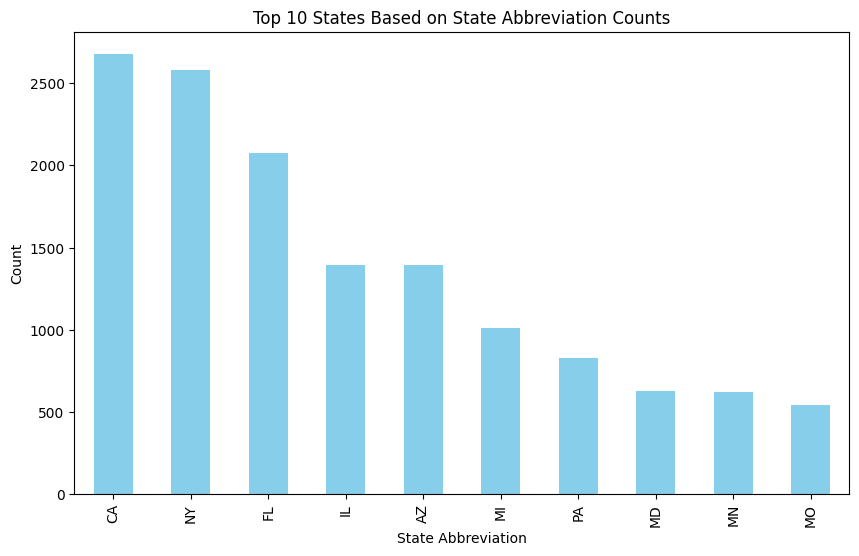

In [28]:
# Replace 'State_Abbr' with the actual column name if it's different
primary_state_abbr_counts = df_primary['State_Abbr'].value_counts()

# Get the top 10 states
primary_top_10_states = primary_state_abbr_counts.head(10)

# Plotting
plt.figure(figsize=(10, 6))
primary_top_10_states.plot(kind='bar', color='skyblue')
plt.title('Top 10 States Based on State Abbreviation Counts')
plt.xlabel('State Abbreviation')
plt.ylabel('Count')
plt.show()

In [29]:
primary_top_regions = df_primary['Primary_HHS_Region_Name'].value_counts()
primary_top_regions

Region IX      4597
Region V       3781
Region IV      3429
Region II      2579
Region III     1638
Region VIII     990
Region VII      900
Region VI       655
Region I        584
Region X        264
Name: Primary_HHS_Region_Name, dtype: int64

In [30]:
primary_rural_status_count = df_primary['Rural_Status_Desc'].value_counts()
primary_rural_status_count

Non-Rural          13780
Rural               5297
Partially Rural      326
Not Applicable        10
Unknown                4
Name: Rural_Status_Desc, dtype: int64

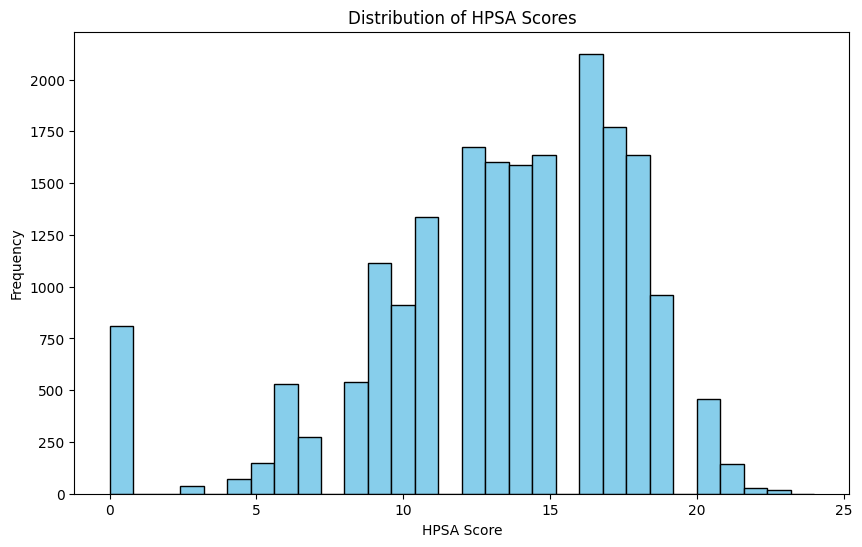

In [31]:
# Assuming 'df_cleaned' is your cleaned DataFrame
# Replace 'HPSA_Score' with the actual column name if it's different
primary_average_hpsa_score = df_primary['HPSA_Score'].mean()
primary_average_hpsa_score

hpsa_scores = df_primary['HPSA_Score']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(hpsa_scores, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of HPSA Scores')
plt.xlabel('HPSA Score')
plt.ylabel('Frequency')
plt.show()

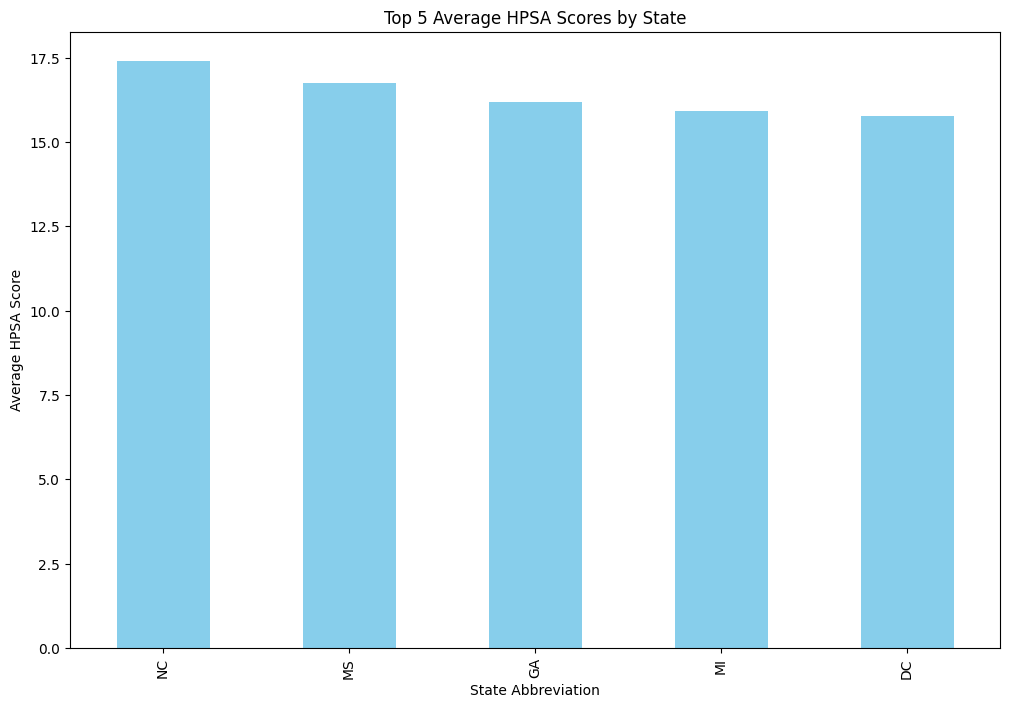

In [35]:
# Replace 'HPSA_Score' and 'State_Abbr' with the actual column names if they're different
primary_average_hpsa_by_state = df_primary.groupby('State_Abbr')['HPSA_Score'].mean().nlargest(5)

# Plotting
plt.figure(figsize=(12, 8))
primary_average_hpsa_by_state.plot(kind='bar', color='skyblue')
plt.title('Top 5 Average HPSA Scores by State')
plt.xlabel('State Abbreviation')
plt.ylabel('Average HPSA Score')
plt.show()

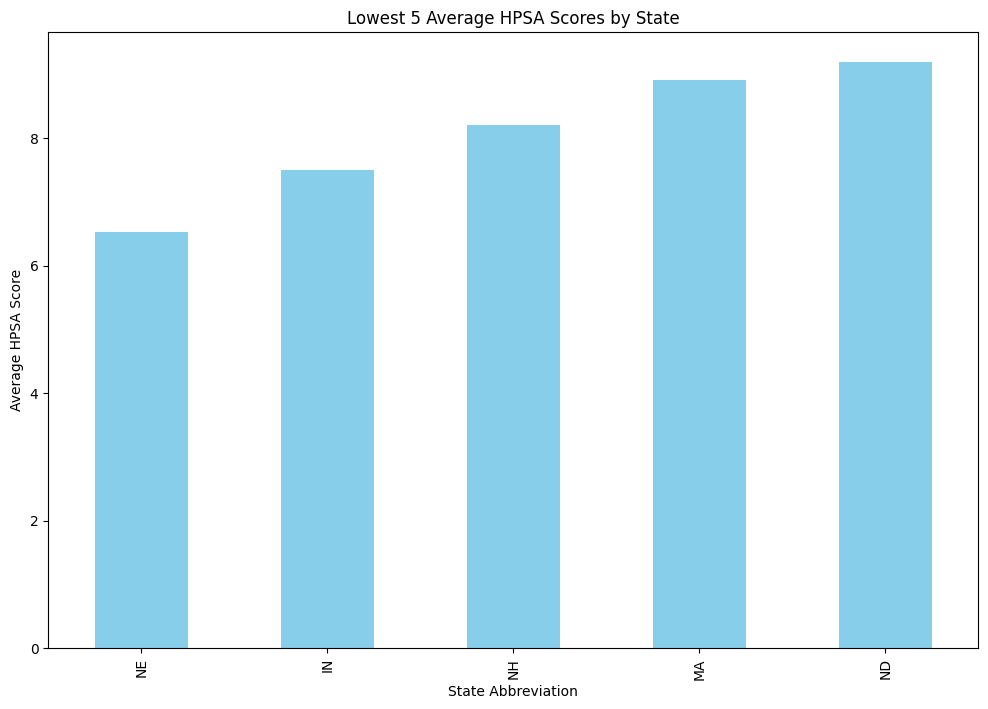

In [37]:
# Replace 'HPSA_Score' and 'State_Abbr' with the actual column names if they're different
primary_5_lowest = df_primary.groupby('State_Abbr')['HPSA_Score'].mean().nsmallest(5)

# Plotting
plt.figure(figsize=(12, 8))
primary_5_lowest.plot(kind='bar', color='skyblue')
plt.title('Lowest 5 Average HPSA Scores by State')
plt.xlabel('State Abbreviation')
plt.ylabel('Average HPSA Score')
plt.show()

In [39]:
primary_average_hpsa_shortage = df_primary['HPSA_Shortage'].mean()
primary_average_hpsa_shortage

12.296505211927693

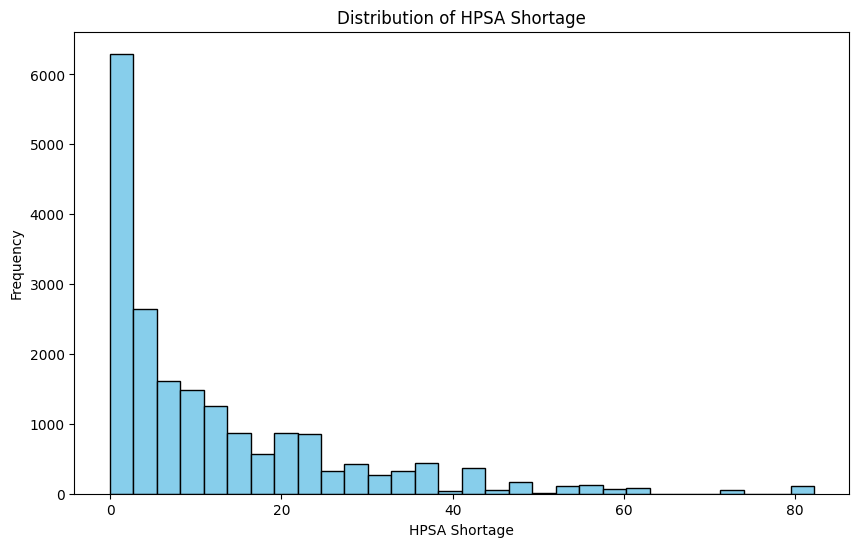

In [38]:
primary_hpsa_shortage = df_primary['HPSA_Shortage']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(primary_hpsa_shortage, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of HPSA Shortage')
plt.xlabel('HPSA Shortage')
plt.ylabel('Frequency')
plt.show()

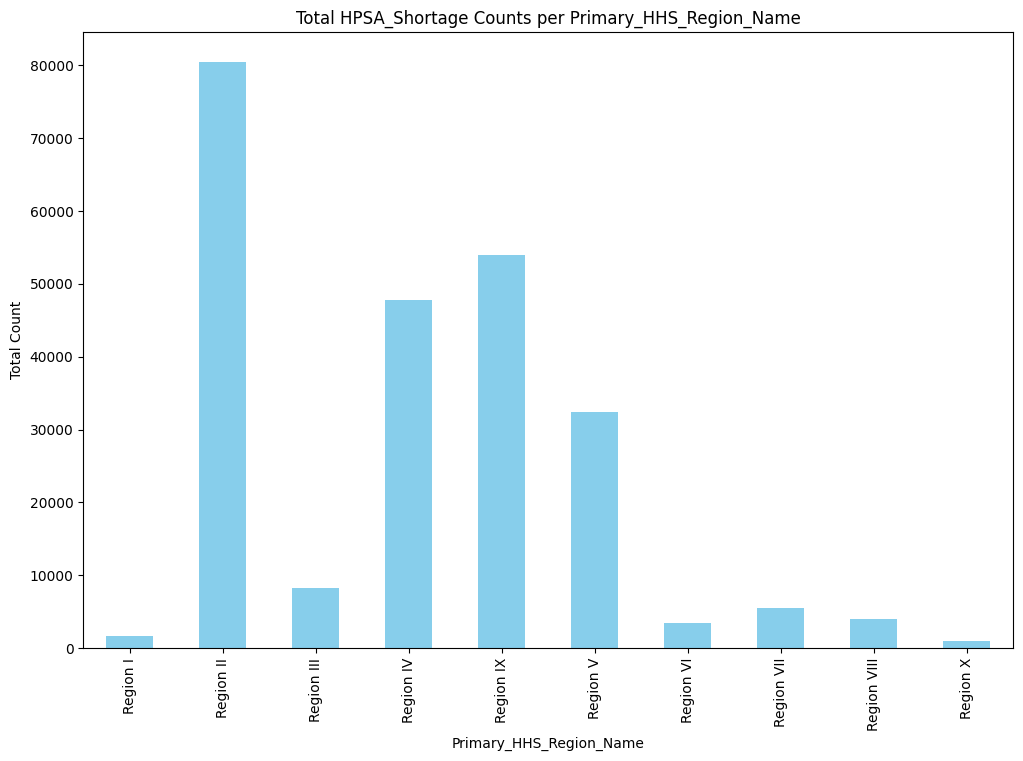

In [40]:

# Replace 'HPSA_Shortage' and 'Primary_HHS_Region_Name' with the actual column names if they're different
hpsa_region_sum = df_primary.groupby('Primary_HHS_Region_Name')['HPSA_Shortage'].sum()

# Plotting
hpsa_region_sum.plot(kind='bar', figsize=(12, 8), color='skyblue')
plt.title('Total HPSA_Shortage Counts per Primary_HHS_Region_Name')
plt.xlabel('Primary_HHS_Region_Name')
plt.ylabel('Total Count')
plt.show()

In [41]:
primary_avg_poverty = df_primary['Percent_Pop_Below_Poverty'].mean()
primary_avg_poverty

22.143101405984446

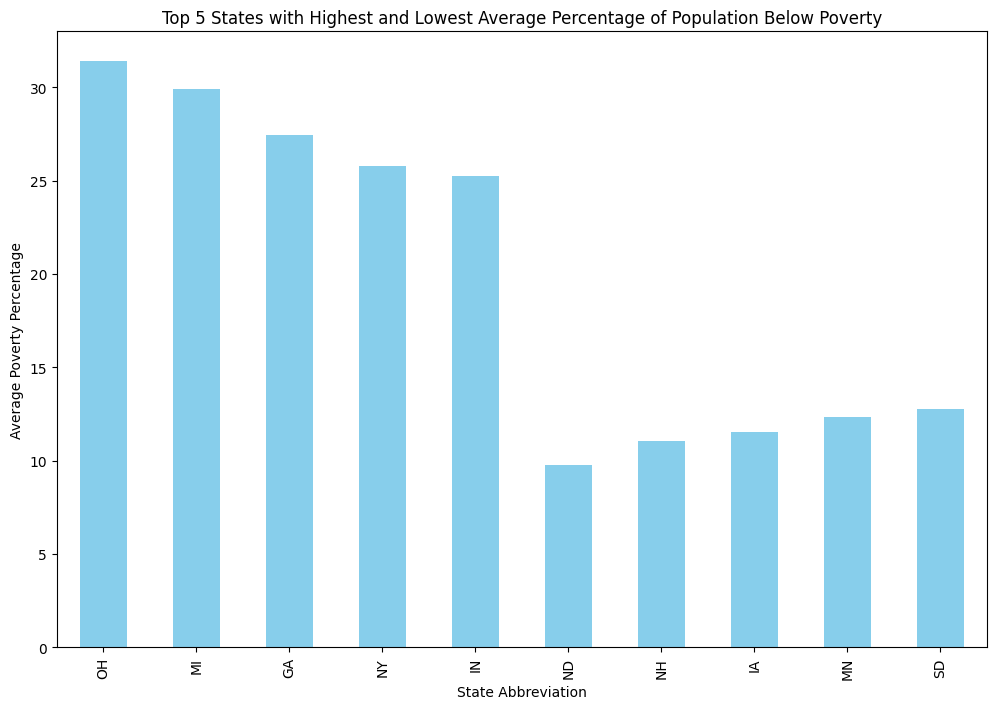

In [42]:

# Replace 'HPSA_Score' and 'State_Abbr' with the actual column names if they're different
primary_avg_poverty_by_state = df_primary.groupby('State_Abbr')['Percent_Pop_Below_Poverty'].mean()

# Find the top 5 states with the highest and lowest average scores
primary_top_5_poverty = primary_avg_poverty_by_state.nlargest(5)
primary_lowest_5_poverty = primary_avg_poverty_by_state.nsmallest(5)

# Combine the two sets of states
primary_poverty_states = pd.concat([primary_top_5_poverty, primary_lowest_5_poverty])

# Plotting
plt.figure(figsize=(12, 8))
primary_poverty_states.plot(kind='bar', color='skyblue')
plt.title('Top 5 States with Highest and Lowest Average Percentage of Population Below Poverty')
plt.xlabel('State Abbreviation')
plt.ylabel('Average Poverty Percentage')
plt.show()


# Dental

In [3]:
df_dental = pd.read_csv('dental.csv')
len(df_dental.index)

/var/folders/2g/r06hxxyx0tv4z9vkjcrvtdsw0000gn/T/ipykernel_7089/1436766540.py:1: DtypeWarning: Columns (6,7,9,26,37,40,59,67,68,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dental = pd.read_csv('dental.csv')


30646

In [4]:
# Loop through each column
for column in df_dental.columns:
    # Calculate the number of missing values in the column
    missing_values_count = df_dental[column].isnull().sum()
    
    # Calculate the number of unique values in the column
    unique_values_count = df_dental[column].nunique()
    
    # Print the results
    print(f"Column: {column}")
    print(f"   Number of missing values: {missing_values_count}")
    print(f"   Number of unique values: {unique_values_count}")
    print()


Column: Source_ID
   Number of missing values: 0
   Number of unique values: 9621

Column: Source_Name
   Number of missing values: 0
   Number of unique values: 9008

Column: Status_Code
   Number of missing values: 0
   Number of unique values: 3

Column: Status_Description
   Number of missing values: 0
   Number of unique values: 3

Column: Type_Code
   Number of missing values: 0
   Number of unique values: 12

Column: Type_Desc
   Number of missing values: 0
   Number of unique values: 10

Column: Address
   Number of missing values: 25527
   Number of unique values: 4874

Column: City
   Number of missing values: 25478
   Number of unique values: 2867

Column: State_Abbr
   Number of missing values: 0
   Number of unique values: 59

Column: Postal_Code
   Number of missing values: 25479
   Number of unique values: 4855

Column: Degree_of_Shortage
   Number of missing values: 4733
   Number of unique values: 29

Column: Designation_Date
   Number of missing values: 0
   Number of

In [5]:
# List of columns to keep
dental_keep_columns = ['Source_ID', 'Status_Description', 'Type_Desc',
                   'State_Abbr', 'Degree_of_Shortage', 'Designation_Date',
                   'Designation_Last_Update_Date', 'Designation_Pop',
                   'Estimated_Underserved_Pop', 'Estimated_Served_Pop',
                   'Total_FTE_Clinicians', 'Metropolitan_Indicator_Desc',
                   'Percent_Pop_Below_Poverty', 'HPSA_Score', 'HPSA_Shortage',
                   'Component_Source_Name', 'Component_Status_Desc', 'Component_Type_Desc',
                   'County_Name', 'StateCountyFIPS', 'Primary_HHS_Region_Name',
                   'US_Mexico_Border_County', 'HPSA_Name', 'HPSA_Component_Name',
                   'HPSA_Pop_Type_Code', 'HPSA_Pop_Type_Desc', 'Rural_Status_Desc',
                   'HPSA_Designation_Pop_Type_Desc']

# Update DataFrame to include only the specified columns
df_dental = df_dental[dental_keep_columns]

df_dental


,Source_ID,Status_Description,Type_Desc,State_Abbr,Degree_of_Shortage,Designation_Date,Designation_Last_Update_Date,Designation_Pop,Estimated_Underserved_Pop,Estimated_Served_Pop,...,County_Name,StateCountyFIPS,Primary_HHS_Region_Name,US_Mexico_Border_County,HPSA_Name,HPSA_Component_Name,HPSA_Pop_Type_Code,HPSA_Pop_Type_Desc,Rural_Status_Desc,HPSA_Designation_Pop_Type_Desc
0,6409994016,Withdrawn,"Indian, Tribal and Urban Indian Organizations",OK,NaN,10/26/2002,2/14/2012,NaN,NaN,NaN,...,Pontotoc,40123,Region VI,N,Carl Albert Indian Hospital,Carl Albert Indian Hospital,NaN,NaN,Rural,"Indian, Tribal and Urban Indian Organizations"
1,6319993124,Withdrawn,"Indian, Tribal and Urban Indian Organizations",NE,NaN,10/26/2002,5/2/2014,NaN,NaN,NaN,...,Thurston,31173,Region VII,N,Winnebago PHS Indian Hospital,Winnebago PHS Indian Hospital,NaN,NaN,Rural,"Indian, Tribal and Urban Indian Organizations"
2,6089990849,Withdrawn,"Indian, Tribal and Urban Indian Organizations",CO,NaN,10/26/2002,6/14/2011,NaN,NaN,NaN,...,La Plata,8067,Region VIII,N,Southern Colorado Ute Services Unit-Federal,Southern Colorado Ute Services Unit-Federal,NaN,NaN,Rural,"Indian, Tribal and Urban Indian Organizations"
3,60499904B5,Withdrawn,"Indian, Tribal and Urban Indian Organizations",AZ,NaN,12/5/2005,6/11/2016,NaN,NaN,NaN,...,Maricopa,4013,Region IX,N,Phx Area Office Two Renaissance Square,Phx Area Office Two Renaissance Square,NaN,NaN,Non-Rural,"Indian, Tribal and Urban Indian Organizations"
4,6569995629,Designated,"Indian, Tribal and Urban Indian Organizations",WY,NaN,3/1/2006,3/1/2006,NaN,NaN,NaN,...,Fremont,56013,Region VIII,N,Ft. Washakie PHS Indian Health Center,Ft. Washakie PHS Indian Health Center,NaN,NaN,Rural,"Indian, Tribal and Urban Indian Organizations"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30641,6481707750,Proposed For Withdrawal,High Needs Geographic HPSA,TX,Not applicable,5/21/1985,5/16/2019,196595.0,73155.0,123440.0,...,El Paso,48141,Region VI,Y,Southeast El Paso,42.02,TRC,Geographic Population,Non-Rural,Geographic Population
30642,6481707750,Proposed For Withdrawal,High Needs Geographic HPSA,TX,Not applicable,5/21/1985,5/16/2019,196595.0,73155.0,123440.0,...,El Paso,48141,Region VI,Y,Southeast El Paso,41.06,TRC,Geographic Population,Non-Rural,Geographic Population
30643,6481707750,Proposed For Withdrawal,High Needs Geographic HPSA,TX,Not applicable,5/21/1985,5/16/2019,196595.0,73155.0,123440.0,...,El Paso,48141,Region VI,Y,Southeast El Paso,103.46,TRC,Geographic Population,Non-Rural,Geographic Population
30644,6481707750,Proposed For Withdrawal,High Needs Geographic HPSA,TX,Not applicable,5/21/1985,5/16/2019,196595.0,73155.0,123440.0,...,El Paso,48141,Region VI,Y,Southeast El Paso,103.47,TRC,Geographic Population,Non-Rural,Geographic Population


In [6]:

states_to_exclude = ['AS', 'GU', 'MP', 'PR', 'TT', 'VI', 'MH', 'PW', 'FM']

# Filter out rows with specified states
df_dental = df_dental[~df_dental['State_Abbr'].isin(states_to_exclude)]
df_dental

,Source_ID,Status_Description,Type_Desc,State_Abbr,Degree_of_Shortage,Designation_Date,Designation_Last_Update_Date,Designation_Pop,Estimated_Underserved_Pop,Estimated_Served_Pop,...,County_Name,StateCountyFIPS,Primary_HHS_Region_Name,US_Mexico_Border_County,HPSA_Name,HPSA_Component_Name,HPSA_Pop_Type_Code,HPSA_Pop_Type_Desc,Rural_Status_Desc,HPSA_Designation_Pop_Type_Desc
0,6409994016,Withdrawn,"Indian, Tribal and Urban Indian Organizations",OK,NaN,10/26/2002,2/14/2012,NaN,NaN,NaN,...,Pontotoc,40123,Region VI,N,Carl Albert Indian Hospital,Carl Albert Indian Hospital,NaN,NaN,Rural,"Indian, Tribal and Urban Indian Organizations"
1,6319993124,Withdrawn,"Indian, Tribal and Urban Indian Organizations",NE,NaN,10/26/2002,5/2/2014,NaN,NaN,NaN,...,Thurston,31173,Region VII,N,Winnebago PHS Indian Hospital,Winnebago PHS Indian Hospital,NaN,NaN,Rural,"Indian, Tribal and Urban Indian Organizations"
2,6089990849,Withdrawn,"Indian, Tribal and Urban Indian Organizations",CO,NaN,10/26/2002,6/14/2011,NaN,NaN,NaN,...,La Plata,8067,Region VIII,N,Southern Colorado Ute Services Unit-Federal,Southern Colorado Ute Services Unit-Federal,NaN,NaN,Rural,"Indian, Tribal and Urban Indian Organizations"
3,60499904B5,Withdrawn,"Indian, Tribal and Urban Indian Organizations",AZ,NaN,12/5/2005,6/11/2016,NaN,NaN,NaN,...,Maricopa,4013,Region IX,N,Phx Area Office Two Renaissance Square,Phx Area Office Two Renaissance Square,NaN,NaN,Non-Rural,"Indian, Tribal and Urban Indian Organizations"
4,6569995629,Designated,"Indian, Tribal and Urban Indian Organizations",WY,NaN,3/1/2006,3/1/2006,NaN,NaN,NaN,...,Fremont,56013,Region VIII,N,Ft. Washakie PHS Indian Health Center,Ft. Washakie PHS Indian Health Center,NaN,NaN,Rural,"Indian, Tribal and Urban Indian Organizations"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30641,6481707750,Proposed For Withdrawal,High Needs Geographic HPSA,TX,Not applicable,5/21/1985,5/16/2019,196595.0,73155.0,123440.0,...,El Paso,48141,Region VI,Y,Southeast El Paso,42.02,TRC,Geographic Population,Non-Rural,Geographic Population
30642,6481707750,Proposed For Withdrawal,High Needs Geographic HPSA,TX,Not applicable,5/21/1985,5/16/2019,196595.0,73155.0,123440.0,...,El Paso,48141,Region VI,Y,Southeast El Paso,41.06,TRC,Geographic Population,Non-Rural,Geographic Population
30643,6481707750,Proposed For Withdrawal,High Needs Geographic HPSA,TX,Not applicable,5/21/1985,5/16/2019,196595.0,73155.0,123440.0,...,El Paso,48141,Region VI,Y,Southeast El Paso,103.46,TRC,Geographic Population,Non-Rural,Geographic Population
30644,6481707750,Proposed For Withdrawal,High Needs Geographic HPSA,TX,Not applicable,5/21/1985,5/16/2019,196595.0,73155.0,123440.0,...,El Paso,48141,Region VI,Y,Southeast El Paso,103.47,TRC,Geographic Population,Non-Rural,Geographic Population


In [7]:
# remove missing rows
# Replace the column names if they are different in your dataset
columns_to_check = ['Degree_of_Shortage', 'Designation_Pop', 'Estimated_Underserved_Pop',
                    'Estimated_Served_Pop', 'Total_FTE_Clinicians', 'Percent_Pop_Below_Poverty',
                    'HPSA_Shortage', 'HPSA_Pop_Type_Code', 'HPSA_Pop_Type_Desc', 'Rural_Status_Desc']

# Drop rows with missing values in the specified columns
df_dental = df_dental.dropna(subset=columns_to_check)

df_dental

,Source_ID,Status_Description,Type_Desc,State_Abbr,Degree_of_Shortage,Designation_Date,Designation_Last_Update_Date,Designation_Pop,Estimated_Underserved_Pop,Estimated_Served_Pop,...,County_Name,StateCountyFIPS,Primary_HHS_Region_Name,US_Mexico_Border_County,HPSA_Name,HPSA_Component_Name,HPSA_Pop_Type_Code,HPSA_Pop_Type_Desc,Rural_Status_Desc,HPSA_Designation_Pop_Type_Desc
5455,6049990426,Withdrawn,Geographic HPSA,AZ,Not applicable,8/12/1993,7/2/2018,19883.0,14883.0,5000.0,...,Pinal,4021,Region IX,N,San Manuel,24,TRC,Geographic Population,Rural,Geographic Population
5456,6049990426,Withdrawn,Geographic HPSA,AZ,Not applicable,8/12/1993,7/2/2018,19883.0,14883.0,5000.0,...,Pinal,4021,Region IX,N,San Manuel,6.04,TRC,Geographic Population,Non-Rural,Geographic Population
5457,6049990426,Withdrawn,Geographic HPSA,AZ,Not applicable,8/12/1993,7/2/2018,19883.0,14883.0,5000.0,...,Pinal,4021,Region IX,N,San Manuel,6.03,TRC,Geographic Population,Non-Rural,Geographic Population
5458,6049990426,Withdrawn,Geographic HPSA,AZ,Not applicable,8/12/1993,7/2/2018,19883.0,14883.0,5000.0,...,Pinal,4021,Region IX,N,San Manuel,7,TRC,Geographic Population,Non-Rural,Geographic Population
5459,6049990426,Withdrawn,Geographic HPSA,AZ,Not applicable,8/12/1993,7/2/2018,19883.0,14883.0,5000.0,...,Pinal,4021,Region IX,N,San Manuel,22,TRC,Geographic Population,Rural,Geographic Population
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30641,6481707750,Proposed For Withdrawal,High Needs Geographic HPSA,TX,Not applicable,5/21/1985,5/16/2019,196595.0,73155.0,123440.0,...,El Paso,48141,Region VI,Y,Southeast El Paso,42.02,TRC,Geographic Population,Non-Rural,Geographic Population
30642,6481707750,Proposed For Withdrawal,High Needs Geographic HPSA,TX,Not applicable,5/21/1985,5/16/2019,196595.0,73155.0,123440.0,...,El Paso,48141,Region VI,Y,Southeast El Paso,41.06,TRC,Geographic Population,Non-Rural,Geographic Population
30643,6481707750,Proposed For Withdrawal,High Needs Geographic HPSA,TX,Not applicable,5/21/1985,5/16/2019,196595.0,73155.0,123440.0,...,El Paso,48141,Region VI,Y,Southeast El Paso,103.46,TRC,Geographic Population,Non-Rural,Geographic Population
30644,6481707750,Proposed For Withdrawal,High Needs Geographic HPSA,TX,Not applicable,5/21/1985,5/16/2019,196595.0,73155.0,123440.0,...,El Paso,48141,Region VI,Y,Southeast El Paso,103.47,TRC,Geographic Population,Non-Rural,Geographic Population


In [10]:
# check and make sure missing values are dropped


# Loop through each column
for column in df_dental.columns:
    # Calculate the number of missing values in the column
    missing_values_count = df_dental[column].isnull().sum()
    
    # Calculate the number of unique values in the column
    unique_values_count = df_dental[column].nunique()
    
    # Print the results
    print(f"Column: {column}")
    print(f"   Number of missing values: {missing_values_count}")
    print(f"   Number of unique values: {unique_values_count}")
    print()


Column: Source_ID
   Number of missing values: 0
   Number of unique values: 2817

Column: Status_Description
   Number of missing values: 0
   Number of unique values: 3

Column: Type_Desc
   Number of missing values: 0
   Number of unique values: 3

Column: State_Abbr
   Number of missing values: 0
   Number of unique values: 50

Column: Degree_of_Shortage
   Number of missing values: 0
   Number of unique values: 1

Column: Designation_Date
   Number of missing values: 0
   Number of unique values: 1149

Column: Designation_Last_Update_Date
   Number of missing values: 0
   Number of unique values: 161

Column: Designation_Pop
   Number of missing values: 0
   Number of unique values: 2716

Column: Estimated_Underserved_Pop
   Number of missing values: 0
   Number of unique values: 2659

Column: Estimated_Served_Pop
   Number of missing values: 0
   Number of unique values: 838

Column: Total_FTE_Clinicians
   Number of missing values: 0
   Number of unique values: 771

Column: Metr

In [20]:
primary_grouped = df_primary.groupby('State_Abbr').agg({'Percent_Pop_Below_Poverty': 'mean', 'HPSA_Score': 'mean'}).reset_index()
primary_grouped


,State_Abbr,Percent_Pop_Below_Poverty,HPSA_Score
0,AK,15.792308,13.576923
1,AL,23.404498,15.712803
2,AR,18.876966,12.904494
3,AZ,22.346298,13.253055
4,CA,22.907649,12.146269
5,CO,20.768421,11.285319
6,CT,17.519588,13.701031
7,DC,21.890541,15.777027
8,DE,23.162500,9.850000
9,FL,21.052096,15.684819


In [21]:
primary_grouped.to_csv('primary_cleaned2.csv', index=False)


In [18]:
df_primary.to_csv('primary_cleaned.csv', index=False)

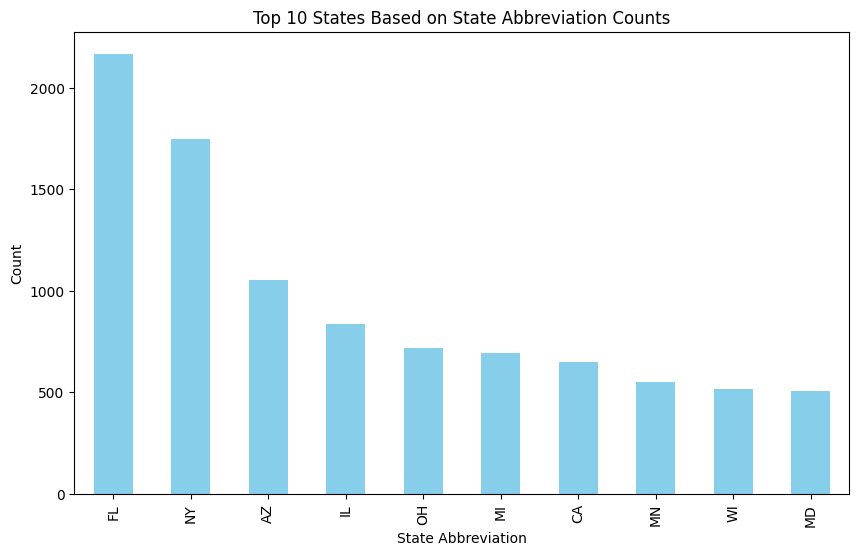

In [11]:
# Replace 'State_Abbr' with the actual column name if it's different
dental_state_abbr_counts = df_dental['State_Abbr'].value_counts()

# Get the top 10 states
dental_top_10_states = dental_state_abbr_counts.head(10)

# Plotting
plt.figure(figsize=(10, 6))
dental_top_10_states.plot(kind='bar', color='skyblue')
plt.title('Top 10 States Based on State Abbreviation Counts')
plt.xlabel('State Abbreviation')
plt.ylabel('Count')
plt.show()

In [13]:
dental_top_regions = df_dental['Primary_HHS_Region_Name'].value_counts()
dental_top_regions

Region V       3432
Region IV      3265
Region IX      2148
Region II      1747
Region III     1244
Region VI       839
Region I        780
Region VII      636
Region VIII     585
Region X        480
Name: Primary_HHS_Region_Name, dtype: int64

In [14]:
dental_rural_status_count = df_dental['Rural_Status_Desc'].value_counts()
dental_rural_status_count

Non-Rural          11455
Rural               3368
Partially Rural      321
Not Applicable         8
Unknown                4
Name: Rural_Status_Desc, dtype: int64

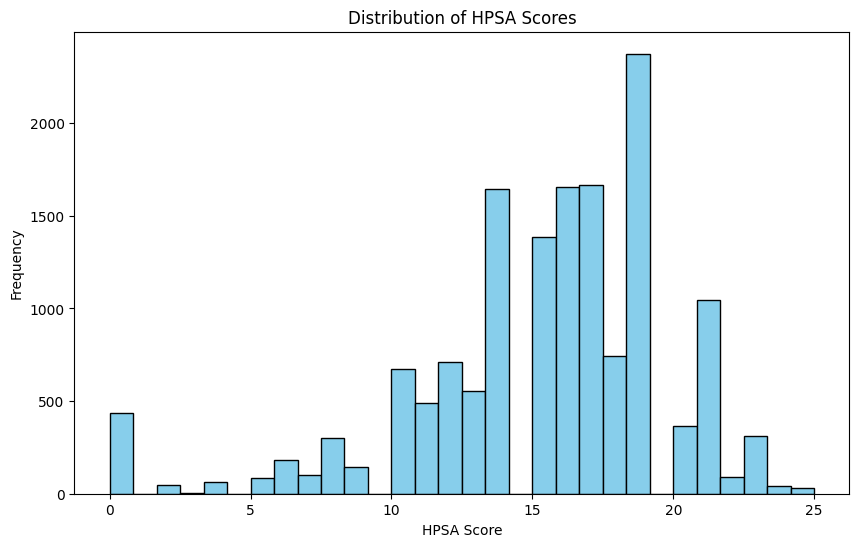

In [15]:
# Assuming 'df_cleaned' is your cleaned DataFrame
# Replace 'HPSA_Score' with the actual column name if it's different
dental_average_hpsa_score = df_dental['HPSA_Score'].mean()
dental_average_hpsa_score

dental_hpsa_scores = df_dental['HPSA_Score']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(dental_hpsa_scores, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of HPSA Scores')
plt.xlabel('HPSA Score')
plt.ylabel('Frequency')
plt.show()

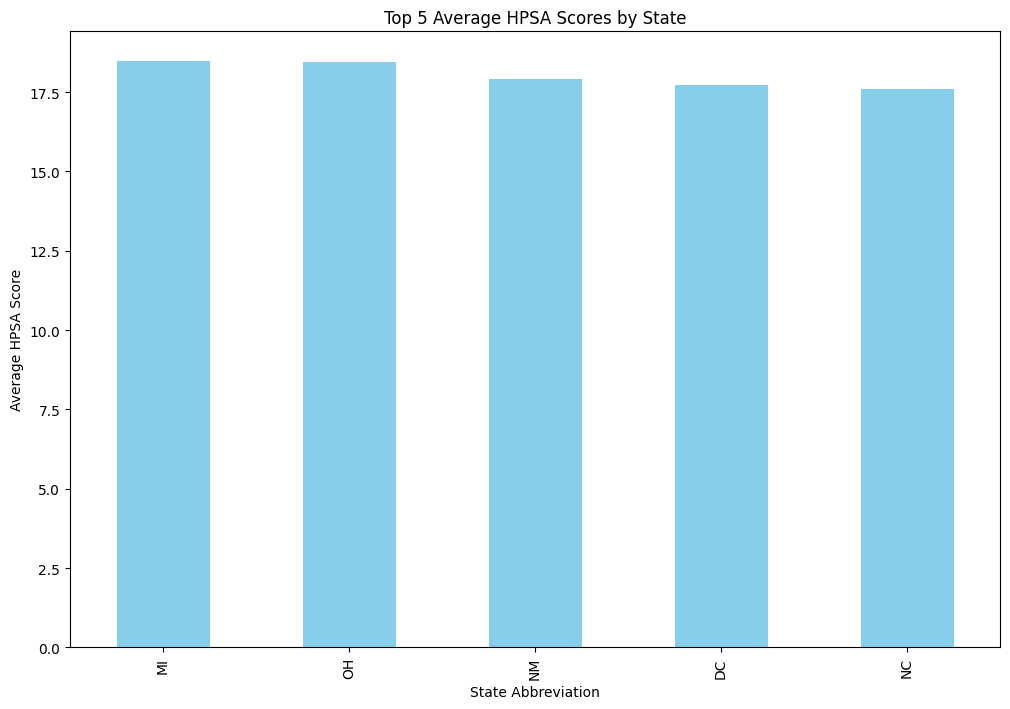

In [16]:
# Replace 'HPSA_Score' and 'State_Abbr' with the actual column names if they're different
dental_average_hpsa_by_state = df_dental.groupby('State_Abbr')['HPSA_Score'].mean().nlargest(5)

# Plotting
plt.figure(figsize=(12, 8))
dental_average_hpsa_by_state.plot(kind='bar', color='skyblue')
plt.title('Top 5 Average HPSA Scores by State')
plt.xlabel('State Abbreviation')
plt.ylabel('Average HPSA Score')
plt.show()

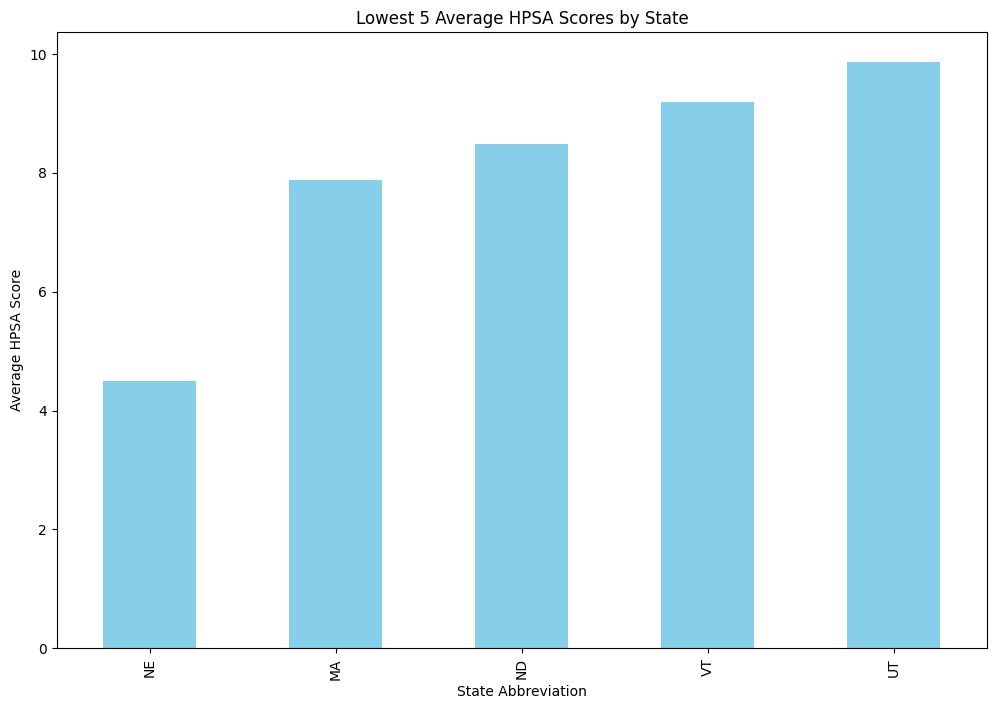

In [17]:

# Replace 'HPSA_Score' and 'State_Abbr' with the actual column names if they're different
dental_5_lowest = df_dental.groupby('State_Abbr')['HPSA_Score'].mean().nsmallest(5)

# Plotting
plt.figure(figsize=(12, 8))
dental_5_lowest.plot(kind='bar', color='skyblue')
plt.title('Lowest 5 Average HPSA Scores by State')
plt.xlabel('State Abbreviation')
plt.ylabel('Average HPSA Score')
plt.show()

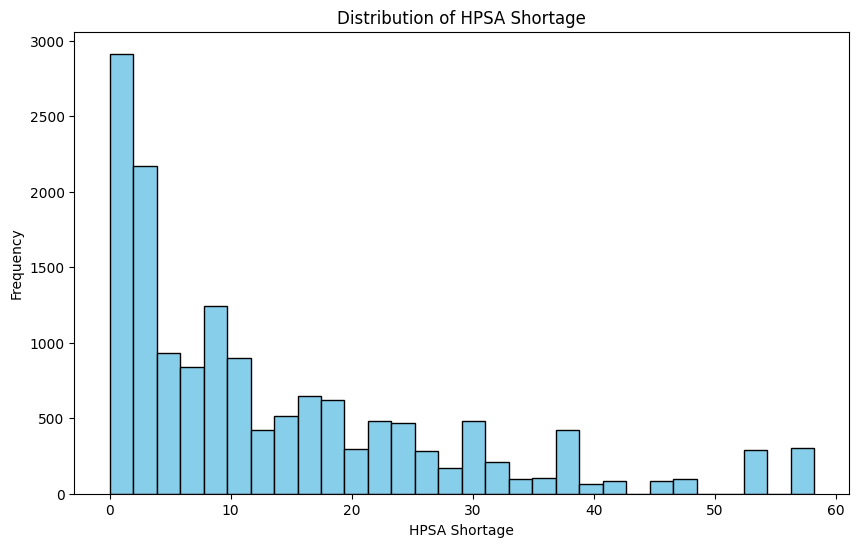

In [19]:


dental_average_hpsa_shortage = df_dental['HPSA_Shortage'].mean()
dental_average_hpsa_shortage

dental_hpsa_shortage = df_dental['HPSA_Shortage']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(dental_hpsa_shortage, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of HPSA Shortage')
plt.xlabel('HPSA Shortage')
plt.ylabel('Frequency')
plt.show()

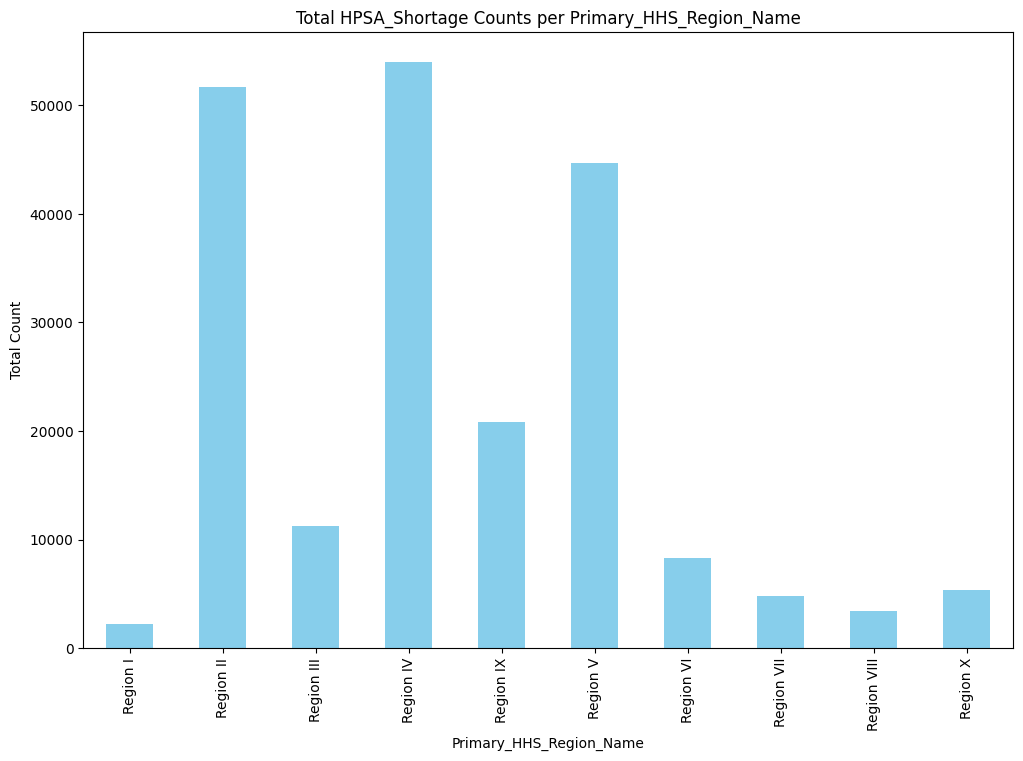

In [20]:
# Replace 'HPSA_Shortage' and 'Primary_HHS_Region_Name' with the actual column names if they're different
dental_hpsa_region_sum = df_dental.groupby('Primary_HHS_Region_Name')['HPSA_Shortage'].sum()

# Plotting
dental_hpsa_region_sum.plot(kind='bar', figsize=(12, 8), color='skyblue')
plt.title('Total HPSA_Shortage Counts per Primary_HHS_Region_Name')
plt.xlabel('Primary_HHS_Region_Name')
plt.ylabel('Total Count')
plt.show()

In [21]:
dental_avg_poverty = df_dental['Percent_Pop_Below_Poverty'].mean()
dental_avg_poverty

23.868751649511744

In [ ]:
# Replace 'HPSA_Score' and 'State_Abbr' with the actual column names if they're different
primary_avg_poverty_by_state = df_primary.groupby('State_Abbr')['Percent_Pop_Below_Poverty'].mean()

# Find the top 5 states with the highest and lowest average scores
primary_top_5_poverty = primary_avg_poverty_by_state.nlargest(5)
primary_lowest_5_poverty = primary_avg_poverty_by_state.nsmallest(5)

# Combine the two sets of states
primary_poverty_states = pd.concat([primary_top_5_poverty, primary_lowest_5_poverty])

# Plotting
plt.figure(figsize=(12, 8))
primary_poverty_states.plot(kind='bar', color='skyblue')
plt.title('Top 5 States with Highest and Lowest Average Percentage of Population Below Poverty')
plt.xlabel('State Abbreviation')
plt.ylabel('Average Poverty Percentage')
plt.show()


In [52]:
df_food = pd.read_csv('food_access_research_atlas.csv')

In [53]:
columns_to_keep = ['CensusTract', 'State', 'County', 'Urban', 'LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome']
df_food = df_food[columns_to_keep]
df_food

,CensusTract,State,County,Urban,LowIncomeTracts,PovertyRate,MedianFamilyIncome
0,1001020100,Alabama,Autauga,1,0,10.0,74750
1,1001020200,Alabama,Autauga,1,0,18.2,51875
2,1001020300,Alabama,Autauga,1,0,19.1,52905
3,1001020400,Alabama,Autauga,1,0,3.3,68079
4,1001020500,Alabama,Autauga,1,0,8.5,77819
...,...,...,...,...,...,...,...
72859,56043000200,Wyoming,Washakie,0,0,15.2,67917
72860,56043000301,Wyoming,Washakie,1,1,14.5,52474
72861,56043000302,Wyoming,Washakie,1,0,12.7,66250
72862,56045951100,Wyoming,Weston,0,0,9.2,81500


In [7]:
selected_columns = ['CensusTract', 'State', 'County', 'Urban', 'LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome']
missing_values = df_food[selected_columns].isnull().sum()
missing_values


CensusTract           0
State                 0
County                0
Urban                 0
LowIncomeTracts       0
PovertyRate           0
MedianFamilyIncome    0
dtype: int64

In [54]:
# Assuming 'df_food' is your DataFrame
# Replace 'CensusTract' with the actual column name if it's different
df_food['CensusTract'] = df_food['CensusTract'].astype(str).apply(lambda x: '0' + x if len(str(x)) < 11 else str(x))
df_food

,CensusTract,State,County,Urban,LowIncomeTracts,PovertyRate,MedianFamilyIncome
0,01001020100,Alabama,Autauga,1,0,10.0,74750
1,01001020200,Alabama,Autauga,1,0,18.2,51875
2,01001020300,Alabama,Autauga,1,0,19.1,52905
3,01001020400,Alabama,Autauga,1,0,3.3,68079
4,01001020500,Alabama,Autauga,1,0,8.5,77819
...,...,...,...,...,...,...,...
72859,56043000200,Wyoming,Washakie,0,0,15.2,67917
72860,56043000301,Wyoming,Washakie,1,1,14.5,52474
72861,56043000302,Wyoming,Washakie,1,0,12.7,66250
72862,56045951100,Wyoming,Weston,0,0,9.2,81500


In [55]:
# extract the first 5 characters of CensusTract
# Assuming 'df_food' is your DataFrame
# Replace 'CensusTract' with the actual column name if it's different
df_food['County'] = df_food['CensusTract'].astype(str).str[:5]

df_food

,CensusTract,State,County,Urban,LowIncomeTracts,PovertyRate,MedianFamilyIncome
0,01001020100,Alabama,01001,1,0,10.0,74750
1,01001020200,Alabama,01001,1,0,18.2,51875
2,01001020300,Alabama,01001,1,0,19.1,52905
3,01001020400,Alabama,01001,1,0,3.3,68079
4,01001020500,Alabama,01001,1,0,8.5,77819
...,...,...,...,...,...,...,...
72859,56043000200,Wyoming,56043,0,0,15.2,67917
72860,56043000301,Wyoming,56043,1,1,14.5,52474
72861,56043000302,Wyoming,56043,1,0,12.7,66250
72862,56045951100,Wyoming,56045,0,0,9.2,81500


In [56]:
df_food.to_csv('food_desert_county.csv', index=False)

In [59]:
state_grouped2 = df_food.groupby('County').agg({'PovertyRate': 'mean', 'MedianFamilyIncome': 'mean'}).reset_index()

state_grouped2.sort_values(by='County', ascending=True, inplace=True)
state_grouped2


,County,PovertyRate,MedianFamilyIncome
0,01001,13.858333,61082.916667
1,01003,14.358065,60664.935484
2,01005,24.533333,43123.000000
3,01007,16.025000,43362.500000
4,01009,17.911111,52136.000000
...,...,...,...
3138,56037,11.841667,81835.083333
3139,56039,8.100000,89555.250000
3140,56041,14.166667,65312.666667
3141,56043,14.133333,62213.666667


In [61]:
state_grouped2.to_csv('food_desert_county2.csv', index=False)

In [26]:
state_grouped = df_food.groupby('State').agg({'PovertyRate': 'mean', 'MedianFamilyIncome': 'mean'}).reset_index()

state_grouped.sort_values(by='PovertyRate', ascending=False, inplace=True)
state_grouped

,State,PovertyRate,MedianFamilyIncome
24,Mississippi,24.640181,47396.203927
18,Louisiana,21.646369,55288.585302
0,Alabama,21.222053,53160.435963
31,New Mexico,20.762926,56887.553106
10,Georgia,20.510840,59798.944529
3,Arkansas,20.350146,51199.271137
17,Kentucky,20.112556,54513.554260
8,District of Columbia,19.715642,98286.290503
48,West Virginia,19.599174,52105.365702
40,South Carolina,19.561197,55113.327289


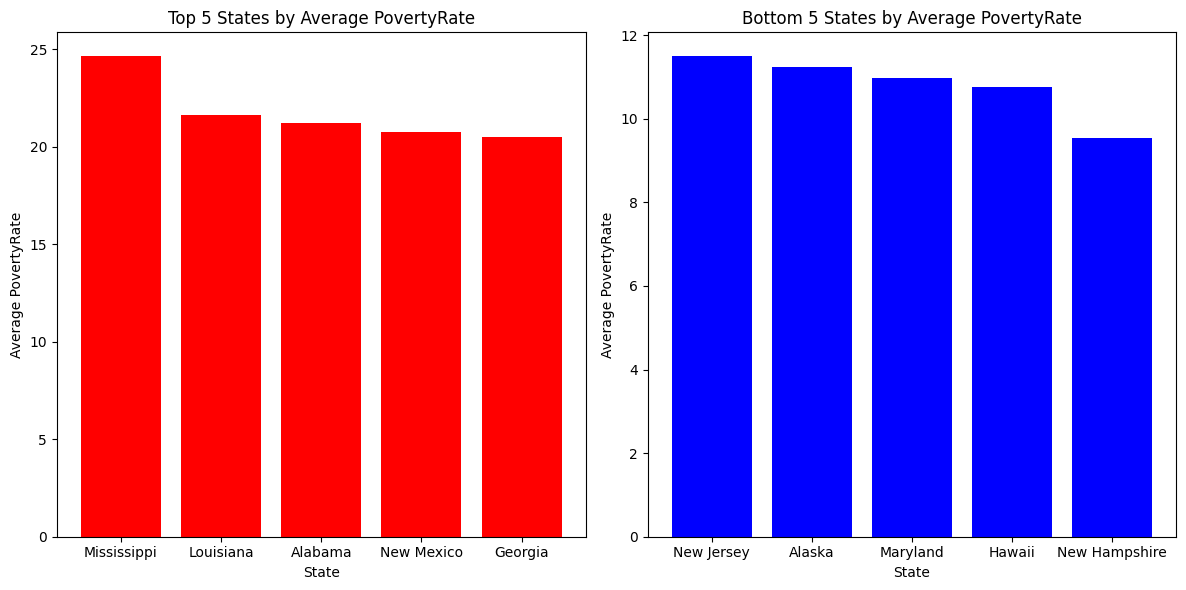

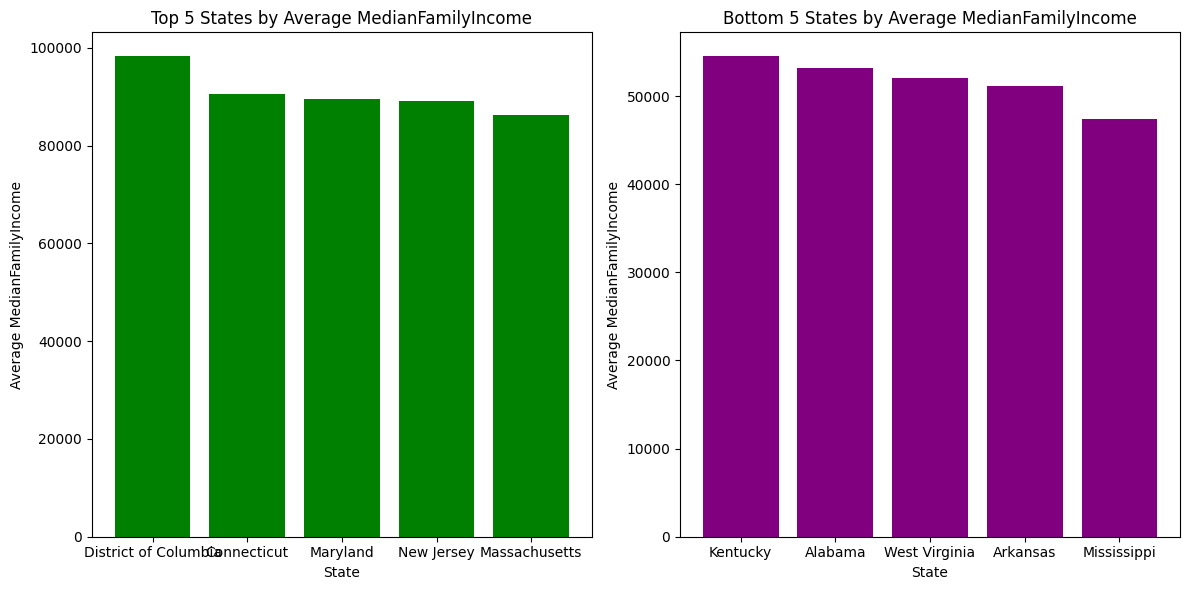

In [9]:
# Sort the DataFrame by PovertyRate and MedianFamilyIncome
state_grouped_sorted_poverty = state_grouped.sort_values(by='PovertyRate', ascending=False)
state_grouped_sorted_income = state_grouped.sort_values(by='MedianFamilyIncome', ascending=False)

# Plot bar graphs for PovertyRate
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(state_grouped_sorted_poverty['State'].head(5), state_grouped_sorted_poverty['PovertyRate'].head(5), color='red')
plt.title('Top 5 States by Average PovertyRate')
plt.xlabel('State')
plt.ylabel('Average PovertyRate')

plt.subplot(1, 2, 2)
plt.bar(state_grouped_sorted_poverty['State'].tail(5), state_grouped_sorted_poverty['PovertyRate'].tail(5), color='blue')
plt.title('Bottom 5 States by Average PovertyRate')
plt.xlabel('State')
plt.ylabel('Average PovertyRate')

plt.tight_layout()
plt.show()

# Plot bar graphs for MedianFamilyIncome
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(state_grouped_sorted_income['State'].head(5), state_grouped_sorted_income['MedianFamilyIncome'].head(5), color='green')
plt.title('Top 5 States by Average MedianFamilyIncome')
plt.xlabel('State')
plt.ylabel('Average MedianFamilyIncome')

plt.subplot(1, 2, 2)
plt.bar(state_grouped_sorted_income['State'].tail(5), state_grouped_sorted_income['MedianFamilyIncome'].tail(5), color='purple')
plt.title('Bottom 5 States by Average MedianFamilyIncome')
plt.xlabel('State')
plt.ylabel('Average MedianFamilyIncome')

plt.tight_layout()
plt.show()


In [10]:
state_grouped.to_csv('food_desert.csv', index=False)